<a href="https://colab.research.google.com/github/JLMendozaCarmona/DataScienceEcosystem/blob/main/Capstone_IBM_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Requests allows us to make HTTP requests which we will use to get data from an API
import requests
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Datetime is a library that allows us to represent dates
import datetime

# Setting this option will print all collumns of a dataframe
pd.set_option('display.max_columns', None)
# Setting this option will print all of the data in a feature
pd.set_option('display.max_colwidth', None)

In [2]:
# Takes the dataset and uses the rocket column to call the API and append the data to the list
def getBoosterVersion(data):
    for x in data['rocket']:
       if x:
        response = requests.get("https://api.spacexdata.com/v4/rockets/"+str(x)).json()
        BoosterVersion.append(response['name'])

In [3]:
# Takes the dataset and uses the launchpad column to call the API and append the data to the list
def getLaunchSite(data):
    for x in data['launchpad']:
       if x:
         response = requests.get("https://api.spacexdata.com/v4/launchpads/"+str(x)).json()
         Longitude.append(response['longitude'])
         Latitude.append(response['latitude'])
         LaunchSite.append(response['name'])

In [4]:
# Takes the dataset and uses the payloads column to call the API and append the data to the lists
def getPayloadData(data):
    for load in data['payloads']:
       if load:
        response = requests.get("https://api.spacexdata.com/v4/payloads/"+load).json()
        PayloadMass.append(response['mass_kg'])
        Orbit.append(response['orbit'])

In [5]:
# Takes the dataset and uses the cores column to call the API and append the data to the lists
def getCoreData(data):
    for core in data['cores']:
            if core['core'] != None:
                response = requests.get("https://api.spacexdata.com/v4/cores/"+core['core']).json()
                Block.append(response['block'])
                ReusedCount.append(response['reuse_count'])
                Serial.append(response['serial'])
            else:
                Block.append(None)
                ReusedCount.append(None)
                Serial.append(None)
            Outcome.append(str(core['landing_success'])+' '+str(core['landing_type']))
            Flights.append(core['flight'])
            GridFins.append(core['gridfins'])
            Reused.append(core['reused'])
            Legs.append(core['legs'])
            LandingPad.append(core['landpad'])

In [6]:
spacex_url="https://api.spacexdata.com/v4/launches/past"

In [7]:
response = requests.get(spacex_url)

In [8]:
print(response.content)

b'[{"fairings":{"reused":false,"recovery_attempt":false,"recovered":false,"ships":[]},"links":{"patch":{"small":"https://images2.imgbox.com/94/f2/NN6Ph45r_o.png","large":"https://images2.imgbox.com/5b/02/QcxHUb5V_o.png"},"reddit":{"campaign":null,"launch":null,"media":null,"recovery":null},"flickr":{"small":[],"original":[]},"presskit":null,"webcast":"https://www.youtube.com/watch?v=0a_00nJ_Y88","youtube_id":"0a_00nJ_Y88","article":"https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html","wikipedia":"https://en.wikipedia.org/wiki/DemoSat"},"static_fire_date_utc":"2006-03-17T00:00:00.000Z","static_fire_date_unix":1142553600,"net":false,"window":0,"rocket":"5e9d0d95eda69955f709d1eb","success":false,"failures":[{"time":33,"altitude":null,"reason":"merlin engine failure"}],"details":"Engine failure at 33 seconds and loss of vehicle","crew":[],"ships":[],"capsules":[],"payloads":["5eb0e4b5b6c3bb0006eeb1e1"],"launchpad":"5e9e4502f5090995de566f86","flight_number":1,"name

In [9]:
static_json_url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/API_call_spacex_api.json'

In [10]:
response.status_code

200

In [11]:
import requests
import pandas as pd

static_json_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/API_call_spacex_api.json'

# Hacer la solicitud GET
response = requests.get(static_json_url)

# Verificar el estado de la respuesta
if response.status_code == 200:
    # Decodificar el contenido de la respuesta como JSON
    json_data = response.json()

    # Convertir el JSON en un DataFrame de Pandas
    df = pd.json_normalize(json_data)

    # Mostrar el DataFrame
    print(df)
else:
    print("Error al obtener los datos. Código de estado:", response.status_code)


         static_fire_date_utc  static_fire_date_unix    tbd    net  window  \
0    2006-03-17T00:00:00.000Z           1.142554e+09  False  False     0.0   
1                        None                    NaN  False  False     0.0   
2                        None                    NaN  False  False     0.0   
3    2008-09-20T00:00:00.000Z           1.221869e+09  False  False     0.0   
4                        None                    NaN  False  False     0.0   
..                        ...                    ...    ...    ...     ...   
102                      None                    NaN  False  False     0.0   
103  2020-10-17T05:23:00.000Z           1.602912e+09  False  False     NaN   
104  2020-10-21T12:55:00.000Z           1.603285e+09  False  False     NaN   
105  2020-09-25T05:42:00.000Z           1.601013e+09  False  False     NaN   
106  2020-11-11T16:17:00.000Z           1.605111e+09  False  False     NaN   

                       rocket  success  \
0    5e9d0d95eda69955

In [20]:
response.json()

[{'fairings': {'reused': False,
   'recovery_attempt': False,
   'recovered': False,
   'ships': []},
  'links': {'patch': {'small': 'https://images2.imgbox.com/3c/0e/T8iJcSN3_o.png',
    'large': 'https://images2.imgbox.com/40/e3/GypSkayF_o.png'},
   'reddit': {'campaign': None,
    'launch': None,
    'media': None,
    'recovery': None},
   'flickr': {'small': [], 'original': []},
   'presskit': None,
   'webcast': 'https://www.youtube.com/watch?v=0a_00nJ_Y88',
   'youtube_id': '0a_00nJ_Y88',
   'article': 'https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html',
   'wikipedia': 'https://en.wikipedia.org/wiki/DemoSat'},
  'static_fire_date_utc': '2006-03-17T00:00:00.000Z',
  'static_fire_date_unix': 1142553600,
  'tbd': False,
  'net': False,
  'window': 0,
  'rocket': '5e9d0d95eda69955f709d1eb',
  'success': False,
  'details': 'Engine failure at 33 seconds and loss of vehicle',
  'crew': [],
  'ships': [],
  'capsules': [],
  'payloads': ['5eb0e4b5b6c3bb0006e

In [21]:
data= pd.json_normalize(response.json())

In [22]:
data.head(5)

,static_fire_date_utc,static_fire_date_unix,tbd,net,window,rocket,success,details,crew,ships,capsules,payloads,launchpad,auto_update,failures,flight_number,name,date_utc,date_unix,date_local,date_precision,upcoming,cores,id,fairings.reused,fairings.recovery_attempt,fairings.recovered,fairings.ships,links.patch.small,links.patch.large,links.reddit.campaign,links.reddit.launch,links.reddit.media,links.reddit.recovery,links.flickr.small,links.flickr.original,links.presskit,links.webcast,links.youtube_id,links.article,links.wikipedia,fairings
0,2006-03-17T00:00:00.000Z,1.142554e+09,False,False,0.0,5e9d0d95eda69955f709d1eb,False,Engine failure at 33 seconds and loss of vehicle,[],[],[],[5eb0e4b5b6c3bb0006eeb1e1],5e9e4502f5090995de566f86,True,"[{'time': 33, 'altitude': None, 'reason': 'merlin engine failure'}]",1,FalconSat,2006-03-24T22:30:00.000Z,1143239400,2006-03-25T10:30:00+12:00,hour,False,"[{'core': '5e9e289df35918033d3b2623', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",5eb87cd9ffd86e000604b32a,False,False,False,[],https://images2.imgbox.com/3c/0e/T8iJcSN3_o.png,https://images2.imgbox.com/40/e3/GypSkayF_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=0a_00nJ_Y88,0a_00nJ_Y88,https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html,https://en.wikipedia.org/wiki/DemoSat,NaN
1,None,NaN,False,False,0.0,5e9d0d95eda69955f709d1eb,False,"Successful first stage burn and transition to second stage, maximum altitude 289 km, Premature engine shutdown at T+7 min 30 s, Failed to reach orbit, Failed to recover first stage",[],[],[],[5eb0e4b6b6c3bb0006eeb1e2],5e9e4502f5090995de566f86,True,"[{'time': 301, 'altitude': 289, 'reason': 'harmonic oscillation leading to premature engine shutdown'}]",2,DemoSat,2007-03-21T01:10:00.000Z,1174439400,2007-03-21T13:10:00+12:00,hour,False,"[{'core': '5e9e289ef35918416a3b2624', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",5eb87cdaffd86e000604b32b,False,False,False,[],https://images2.imgbox.com/4f/e3/I0lkuJ2e_o.png,https://images2.imgbox.com/be/e7/iNqsqVYM_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=Lk4zQ2wP-Nc,Lk4zQ2wP-Nc,https://www.space.com/3590-spacex-falcon-1-rocket-fails-reach-orbit.html,https://en.wikipedia.org/wiki/DemoSat,NaN
2,None,NaN,False,False,0.0,5e9d0d95eda69955f709d1eb,False,Residual stage 1 thrust led to collision between stage 1 and stage 2,[],[],[],"[5eb0e4b6b6c3bb0006eeb1e3, 5eb0e4b6b6c3bb0006eeb1e4]",5e9e4502f5090995de566f86,True,"[{'time': 140, 'altitude': 35, 'reason': 'residual stage-1 thrust led to collision between stage 1 and stage 2'}]",3,Trailblazer,2008-08-03T03:34:00.000Z,1217734440,2008-08-03T15:34:00+12:00,hour,False,"[{'core': '5e9e289ef3591814873b2625', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",5eb87cdbffd86e000604b32c,False,False,False,[],https://images2.imgbox.com/3d/86/cnu0pan8_o.png,https://images2.imgbox.com/4b/bd/d8UxLh4q_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=v0w9p3U8860,v0w9p3U8860,http://www.spacex.com/news/2013/02/11/falcon-1-flight-3-mission-summary,https://en.wikipedia.org/wiki/Trailblazer_(satellite),NaN
3,2008-09-20T00:00:00.000Z,1.221869e+09,False,False,0.0,5e9d0d95eda69955f709d1eb,True,"Ratsat was carried to orbit on the first successful orbital launch of any privately funded and developed, liquid-propelled carrier rocket, the SpaceX Falcon 1",[],[],[],[5eb0e4b7b6c3bb0006eeb1e5],5e9e4502f5090995de566f86,True,[],4,RatSat,2008-09-28T23:15:00.000Z,1222643700,2008-09-28T11:15:00+12:00,hour,False,"[{'core': '5e9e289ef3591855dc3b2626', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_succes

In [23]:
# Lets take a subset of our dataframe keeping only the features we want and the flight number, and date_utc.
data = data[['rocket', 'payloads', 'launchpad', 'cores', 'flight_number', 'date_utc']]

# We will remove rows with multiple cores because those are falcon rockets with 2 extra rocket boosters and rows that have multiple payloads in a single rocket.
data = data[data['cores'].map(len)==1]
data = data[data['payloads'].map(len)==1]

# Since payloads and cores are lists of size 1 we will also extract the single value in the list and replace the feature.
data['cores'] = data['cores'].map(lambda x : x[0])
data['payloads'] = data['payloads'].map(lambda x : x[0])

# We also want to convert the date_utc to a datetime datatype and then extracting the date leaving the time
data['date'] = pd.to_datetime(data['date_utc']).dt.date

# Using the date we will restrict the dates of the launches
data = data[data['date'] <= datetime.date(2020, 11, 13)]

In [24]:
import pandas as pd
import datetime

# 1. Filtrar el DataFrame y mantener solo las columnas relevantes
data = data[['rocket', 'payloads', 'launchpad', 'cores', 'flight_number', 'date_utc']]

# 2. Eliminar filas con múltiples cores o múltiples payloads en un solo cohete
data = data[data['cores'].map(len) == 1]
data = data[data['payloads'].map(len) == 1]

# 3. Extraer valores individuales de las listas
data['cores'] = data['cores'].map(lambda x: x[0])
data['payloads'] = data['payloads'].map(lambda x: x[0])

# 4. Convertir la columna de fecha a un tipo de dato de fecha y extraer la fecha
data['date'] = pd.to_datetime(data['date_utc']).dt.date

# 5. Restringir las fechas de los lanzamientos hasta el 13 de noviembre de 2020
data = data[data['date'] <= datetime.date(2020, 11, 13)]

# Mostrar una vista previa del DataFrame procesado
print(data.head())


Empty DataFrame
Columns: [rocket, payloads, launchpad, cores, flight_number, date_utc, date]
Index: []


In [25]:
#Global variables
BoosterVersion = []
PayloadMass = []
Orbit = []
LaunchSite = []
Outcome = []
Flights = []
GridFins = []
Reused = []
Legs = []
LandingPad = []
Block = []
ReusedCount = []
Serial = []
Longitude = []
Latitude = []

# Function to get detailed information about rockets
def getRocketData(data):
    for rocket_id in data['rocket']:
        if rocket_id:
            try:
                response = requests.get("https://api.spacexdata.com/v4/rockets/" + str(rocket_id)).json()
                # Extract and append booster name to global variable
                BoosterVersion.append(response['name'])
            except Exception as e:
                print("Error:", e)

# Function to get detailed information about payloads
def getPayloadData(data):
    for payload_id in data['payloads']:
        if payload_id:
            try:
                response = requests.get("https://api.spacexdata.com/v4/payloads/" + str(payload_id)).json()
                # Extract and append payload mass and orbit to global variables
                PayloadMass.append(response['mass_kg'])
                Orbit.append(response['orbit'])
            except Exception as e:
                print("Error:", e)

# Function to get detailed information about launchpads
def getLaunchpadData(data):
    for launchpad_id in data['launchpad']:
        if launchpad_id:
            try:
                response = requests.get("https://api.spacexdata.com/v4/launchpads/" + str(launchpad_id)).json()
                # Extract and append launchpad information to global variables
                LaunchSite.append(response['name'])
                Longitude.append(response['longitude'])
                Latitude.append(response['latitude'])
            except Exception as e:
                print("Error:", e)

# Function to get detailed information about cores
def getCoreData(data):
    for core_info in data['cores']:
        if core_info:
            try:
                core_id = core_info['core']
                response = requests.get("https://api.spacexdata.com/v4/cores/" + str(core_id)).json()
                # Extract and append core information to global variables
                Outcome.append(str(core_info['landing_success']) + ' ' + str(core_info['landing_type']))
                Flights.append(core_info['flight'])
                GridFins.append(core_info['gridfins'])
                Reused.append(core_info['reused'])
                Legs.append(core_info['legs'])
                LandingPad.append(core_info['landpad'])
                Block.append(response['block'])
                ReusedCount.append(response['reuse_count'])
                Serial.append(response['serial'])
            except Exception as e:
                print("Error:", e)

# Call functions to populate global variables
getRocketData(data)
getPayloadData(data)
getLaunchpadData(data)
getCoreData(data)

# Create a dictionary from the global variables
launch_dict = {
    'BoosterVersion': BoosterVersion,
    'PayloadMass': PayloadMass,
    'Orbit': Orbit,
    'LaunchSite': LaunchSite,
    'Outcome': Outcome,
    'Flights': Flights,
    'GridFins': GridFins,
    'Reused': Reused,
    'Legs': Legs,
    'LandingPad': LandingPad,
    'Block': Block,
    'ReusedCount': ReusedCount,
    'Serial': Serial,
    'Longitude': Longitude,
    'Latitude': Latitude
}

# Create a new DataFrame from the dictionary
new_df = pd.DataFrame(launch_dict)

# Show summary of the new DataFrame
print(new_df.head())


Empty DataFrame
Columns: [BoosterVersion, PayloadMass, Orbit, LaunchSite, Outcome, Flights, GridFins, Reused, Legs, LandingPad, Block, ReusedCount, Serial, Longitude, Latitude]
Index: []


In [26]:
BoosterVersion

[]

In [27]:
# Call getBoosterVersion
getBoosterVersion(data)

In [28]:
BoosterVersion[0:5]

[]

In [29]:
# Call getCoreData
getCoreData(data)

In [30]:
# Call getPayloadData
getPayloadData(data)

In [31]:
# Call getLaunchSite
getLaunchSite(data)

In [32]:
launch_dict = {'FlightNumber': list(data['flight_number']),
'Date': list(data['date']),
'BoosterVersion':BoosterVersion,
'PayloadMass':PayloadMass,
'Orbit':Orbit,
'LaunchSite':LaunchSite,
'Outcome':Outcome,
'Flights':Flights,
'GridFins':GridFins,
'Reused':Reused,
'Legs':Legs,
'LandingPad':LandingPad,
'Block':Block,
'ReusedCount':ReusedCount,
'Serial':Serial,
'Longitude': Longitude,
'Latitude': Latitude}

In [33]:
import pandas as pd

# Crear un DataFrame desde el diccionario launch_dict
new_df = pd.DataFrame(launch_dict)

# Mostrar una vista previa del nuevo DataFrame
print(new_df.head())


Empty DataFrame
Columns: [FlightNumber, Date, BoosterVersion, PayloadMass, Orbit, LaunchSite, Outcome, Flights, GridFins, Reused, Legs, LandingPad, Block, ReusedCount, Serial, Longitude, Latitude]
Index: []


In [34]:
# Mostrar un resumen del DataFrame
print(new_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    0 non-null      float64
 1   Date            0 non-null      float64
 2   BoosterVersion  0 non-null      float64
 3   PayloadMass     0 non-null      float64
 4   Orbit           0 non-null      float64
 5   LaunchSite      0 non-null      float64
 6   Outcome         0 non-null      float64
 7   Flights         0 non-null      float64
 8   GridFins        0 non-null      float64
 9   Reused          0 non-null      float64
 10  Legs            0 non-null      float64
 11  LandingPad      0 non-null      float64
 12  Block           0 non-null      float64
 13  ReusedCount     0 non-null      float64
 14  Serial          0 non-null      float64
 15  Longitude       0 non-null      float64
 16  Latitude        0 non-null      float64
dtypes: float64(17)
memory usage: 124.0 bytes
None


In [35]:
# Filtrar el DataFrame para incluir solo los lanzamientos de Falcon 9
data_falcon9 = new_df[new_df['BoosterVersion'] == 'Falcon 9']

# Mostrar una vista previa del nuevo DataFrame filtrado
print(data_falcon9.head())


Empty DataFrame
Columns: [FlightNumber, Date, BoosterVersion, PayloadMass, Orbit, LaunchSite, Outcome, Flights, GridFins, Reused, Legs, LandingPad, Block, ReusedCount, Serial, Longitude, Latitude]
Index: []


In [36]:
data_falcon9.loc[:,'FlightNumber'] = list(range(1, data_falcon9.shape[0]+1))
data_falcon9

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude


In [37]:
data_falcon9.isnull().sum()

FlightNumber      0.0
Date              0.0
BoosterVersion    0.0
PayloadMass       0.0
Orbit             0.0
LaunchSite        0.0
Outcome           0.0
Flights           0.0
GridFins          0.0
Reused            0.0
Legs              0.0
LandingPad        0.0
Block             0.0
ReusedCount       0.0
Serial            0.0
Longitude         0.0
Latitude          0.0
dtype: float64

In [38]:
import numpy as np

# Calcular la media de la columna PayloadMass
mean_payload_mass = data_falcon9['PayloadMass'].mean()

# Reemplazar los valores NaN en la columna PayloadMass con la media calculada
data_falcon9['PayloadMass'].replace(np.nan, mean_payload_mass, inplace=True)

# Mostrar una vista previa del DataFrame actualizado
print(data_falcon9.head())


Empty DataFrame
Columns: [FlightNumber, Date, BoosterVersion, PayloadMass, Orbit, LaunchSite, Outcome, Flights, GridFins, Reused, Legs, LandingPad, Block, ReusedCount, Serial, Longitude, Latitude]
Index: []


In [39]:
pip install requests beautifulsoup4

In [40]:
import sys

import requests
from bs4 import BeautifulSoup
import re
import unicodedata
import pandas as pd

In [41]:
def date_time(table_cells):
    """
    This function returns the data and time from the HTML  table cell
    Input: the  element of a table data cell extracts extra row
    """
    return [data_time.strip() for data_time in list(table_cells.strings)][0:2]

def booster_version(table_cells):
    """
    This function returns the booster version from the HTML  table cell
    Input: the  element of a table data cell extracts extra row
    """
    out=''.join([booster_version for i,booster_version in enumerate( table_cells.strings) if i%2==0][0:-1])
    return out

def landing_status(table_cells):
    """
    This function returns the landing status from the HTML table cell
    Input: the  element of a table data cell extracts extra row
    """
    out=[i for i in table_cells.strings][0]
    return out


def get_mass(table_cells):
    mass=unicodedata.normalize("NFKD", table_cells.text).strip()
    if mass:
        mass.find("kg")
        new_mass=mass[0:mass.find("kg")+2]
    else:
        new_mass=0
    return new_mass


def extract_column_from_header(row):
    """
    This function returns the landing status from the HTML table cell
    Input: the  element of a table data cell extracts extra row
    """
    if (row.br):
        row.br.extract()
    if row.a:
        row.a.extract()
    if row.sup:
        row.sup.extract()

    colunm_name = ' '.join(row.contents)

    # Filter the digit and empty names
    if not(colunm_name.strip().isdigit()):
        colunm_name = colunm_name.strip()
        return colunm_name

In [42]:
static_url = "https://en.wikipedia.org/w/index.php?title=List_of_Falcon_9_and_Falcon_Heavy_launches&oldid=1027686922"

In [43]:
response.status_code

200

In [44]:
from bs4 import BeautifulSoup

# Crear un objeto BeautifulSoup a partir del HTML de la respuesta
soup = BeautifulSoup(response.text, 'html.parser')

# Verificar si la creación del objeto fue exitosa
if soup:
    print("Objeto BeautifulSoup creado correctamente.")
else:
    print("Error al crear el objeto BeautifulSoup.")


Objeto BeautifulSoup creado correctamente.


In [46]:
# Encontrar todas las tablas en la página
tables = soup.find_all('table')

# Iterar sobre las tablas para encontrar la tabla de interés
for table in tables:
    # Verificar si la tabla contiene la clase "wikitable"
    if 'wikitable' in table.get('class', []):
        # Extraer los nombres de columna de la fila de encabezado
        header_row = table.find('tr')
        column_names = [th.text.strip() for th in header_row.find_all('th')]
        # Imprimir los nombres de columna
        print("Nombres de columna:", column_names)
        break


In [49]:
# Encontrar todas las tablas en la página
tables = soup.find_all('table')

# Verificar si hay al menos tres tablas en la página
if len(tables) >= 3:
    # Obtener la tercera tabla (índice 2 porque Python usa indexación basada en cero)
    first_launch_table = tables[2]
    # Imprimir el contenido de la tercera tabla
    print(first_launch_table)
else:
    print("No hay suficientes tablas en la página para imprimir la tercera.")



No hay suficientes tablas en la página para imprimir la tercera.


In [52]:
# Encontrar todas las tablas en la página
tables = soup.find_all('table')

# Iterar sobre las tablas para encontrar la tabla de interés
for table in tables:
    # Verificar si la tabla contiene la clase "wikitable"
    if 'wikitable' in table.get('class', []):
        # Encontrar la fila de encabezado de la tabla
        header_row = table.find('tr')
        if header_row:
            # Encontrar todos los elementos <th> en la fila de encabezado
            th_elements = header_row.find_all('th')
            # Extraer el nombre de la columna de cada elemento <th>
            column_names = [extract_column_from_header(th) for th in th_elements]
            # Imprimir los nombres de columna extraídos
            print("Nombres de columna:", column_names)
        break


In [53]:
print(column_names)

[]


In [55]:
import pandas as pd

# Crear un diccionario vacío con las columnas extraídas
launch_data = {column_name: [] for column_name in column_names}

# Imprimir el diccionario para verificar
print("Diccionario de datos del lanzamiento:")
print(launch_data)

# Convertir el diccionario en un DataFrame de Pandas
launch_df = pd.DataFrame(launch_data)

# Imprimir el DataFrame para verificar
print("\nDataFrame de datos del lanzamiento:")
print(launch_df)


Diccionario de datos del lanzamiento:
{}

DataFrame de datos del lanzamiento:
Empty DataFrame
Columns: []
Index: []


In [57]:
extracted_row = 0
#Extract each table
for table_number,table in enumerate(soup.find_all('table',"wikitable plainrowheaders collapsible")):
   # get table row
    for rows in table.find_all("tr"):
        #check to see if first table heading is as number corresponding to launch a number
        if rows.th:
            if rows.th.string:
                flight_number=rows.th.string.strip()
                flag=flight_number.isdigit()
        else:
            flag=False
        #get table element
        row=rows.find_all('td')
        #if it is number save cells in a dictonary
        if flag:
            extracted_row += 1
            # Flight Number value
            # TODO: Append the flight_number into launch_dict with key `Flight No.`
            #print(flight_number)
            datatimelist=date_time(row[0])

            # Date value
            # TODO: Append the date into launch_dict with key `Date`
            date = datatimelist[0].strip(',')
            #print(date)

            # Time value
            # TODO: Append the time into launch_dict with key `Time`
            time = datatimelist[1]
            #print(time)

            # Booster version
            # TODO: Append the bv into launch_dict with key `Version Booster`
            bv=booster_version(row[1])
            if not(bv):
                bv=row[1].a.string
            print(bv)

            # Launch Site
            # TODO: Append the bv into launch_dict with key `Launch Site`
            launch_site = row[2].a.string
            #print(launch_site)

            # Payload
            # TODO: Append the payload into launch_dict with key `Payload`
            payload = row[3].a.string
            #print(payload)

            # Payload Mass
            # TODO: Append the payload_mass into launch_dict with key `Payload mass`
            payload_mass = get_mass(row[4])
            #print(payload)

            # Orbit
            # TODO: Append the orbit into launch_dict with key `Orbit`
            orbit = row[5].a.string
            #print(orbit)

            # Customer
            # TODO: Append the customer into launch_dict with key `Customer`
            customer = row[6].a.string
            #print(customer)

            # Launch outcome
            # TODO: Append the launch_outcome into launch_dict with key `Launch outcome`
            launch_outcome = list(row[7].strings)[0]
            #print(launch_outcome)

            # Booster landing
            # TODO: Append the launch_outcome into launch_dict with key `Booster landing`
            booster_landing = landing_status(row[8])
            #print(booster_landing)


In [58]:
df= pd.DataFrame({ key:pd.Series(value) for key, value in launch_dict.items() })

In [ ]:
!pip install sqlalchemy==1.3.9

In [ ]:
!pip install ipython-sql


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.8 MB/s eta 0:00:00
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 1.3.9
    Uninstalling SQLAlchemy-1.3.9:
      Successfully uninstalled SQLAlchemy-1.3.9


In [61]:
%load_ext sql

In [62]:
import csv, sqlite3

con = sqlite3.connect("my_data1.db")
cur = con.cursor()

In [63]:
%sql sqlite:///my_data1.db

In [64]:
import pandas as pd
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv")
df.to_sql("SPACEXTBL", con, if_exists='replace', index=False,method="multi")

101

In [65]:
%sql create table SPACEXTABLE as select * from SPACEXTBL where Date is not null

 * sqlite:///my_data1.db
Done.


[]

In [66]:
%sql SELECT DISTINCT "Launch Site" FROM SPACEXTABLE;



 * sqlite:///my_data1.db
Done.


"""Launch Site"""
Launch Site


In [67]:
%sql SELECT * FROM SPACEXTABLE WHERE LOWER("Launch Site") LIKE 'cca%' LIMIT 5;


 * sqlite:///my_data1.db
Done.


Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome


In [68]:
%sql SELECT SUM("Payload Mass (kg)") AS "Total Payload Mass (kg)" FROM SPACEXTABLE WHERE "Customer" = 'NASA (CRS)';


 * sqlite:///my_data1.db
Done.


Total Payload Mass (kg)
0.0


In [69]:
%sql SELECT AVG("Payload Mass (kg)") AS "Average Payload Mass (kg)" FROM SPACEXTABLE WHERE "Booster Version" = 'F9 v1.1';


 * sqlite:///my_data1.db
Done.


Average Payload Mass (kg)
None


In [70]:
%sql SELECT MIN(Date) AS "Date of First Successful Landing on Ground Pad" FROM SPACEXTABLE WHERE LOWER("Landing Outcome") = 'success (ground pad)';


 * sqlite:///my_data1.db
Done.


Date of First Successful Landing on Ground Pad
None


In [71]:
%sql SELECT "Booster Version" FROM SPACEXTABLE WHERE LOWER("Landing Outcome") = 'success (drone ship)' AND "Payload Mass (kg)" > 4000 AND "Payload Mass (kg)" < 6000;


 * sqlite:///my_data1.db
Done.


"""Booster Version"""


In [72]:
%sql SELECT "Landing Outcome", COUNT(*) AS "Total Missions" FROM SPACEXTABLE GROUP BY "Landing Outcome";


 * sqlite:///my_data1.db
Done.


"""Landing Outcome""",Total Missions
Landing Outcome,101


In [73]:
%sql SELECT "Booster Version" FROM SPACEXTABLE WHERE "Payload Mass (kg)" = (SELECT MAX("Payload Mass (kg)") FROM SPACEXTABLE);


 * sqlite:///my_data1.db
Done.


"""Booster Version"""
Booster Version
Booster Version
Booster Version
Booster Version
Booster Version
Booster Version
Booster Version
Booster Version
Booster Version
Booster Version


In [74]:
%sql SELECT SUBSTR(Date, 6, 2) AS Month, "Landing Outcome", "Booster Version", "Launch Site" FROM SPACEXTABLE WHERE SUBSTR(Date, 0, 5) = '2015' AND LOWER("Landing Outcome") = 'failure (drone ship)';


 * sqlite:///my_data1.db
Done.


Month,"""Landing Outcome""","""Booster Version""","""Launch Site"""


In [75]:
%sql SELECT "Landing Outcome", COUNT(*) AS "Count" FROM SPACEXTABLE WHERE Date BETWEEN '2010-06-04' AND '2017-03-20' GROUP BY "Landing Outcome" ORDER BY "Count" DESC;


 * sqlite:///my_data1.db
Done.


"""Landing Outcome""",Count
Landing Outcome,31


In [ ]:
!pip install numpy pandas seaborn


In [ ]:

import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

ModuleNotFoundError: No module named 'piplite'

In [ ]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

In [ ]:
import requests
import pandas as pd
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

# Realizar la solicitud GET a la URL y obtener los datos
response = requests.get(URL)

# Leer los datos en un DataFrame de Pandas
df = pd.read_csv(io.StringIO(response.text))

# Ahora puedes usar el DataFrame `df` para trabajar con tus datos


In [ ]:

df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


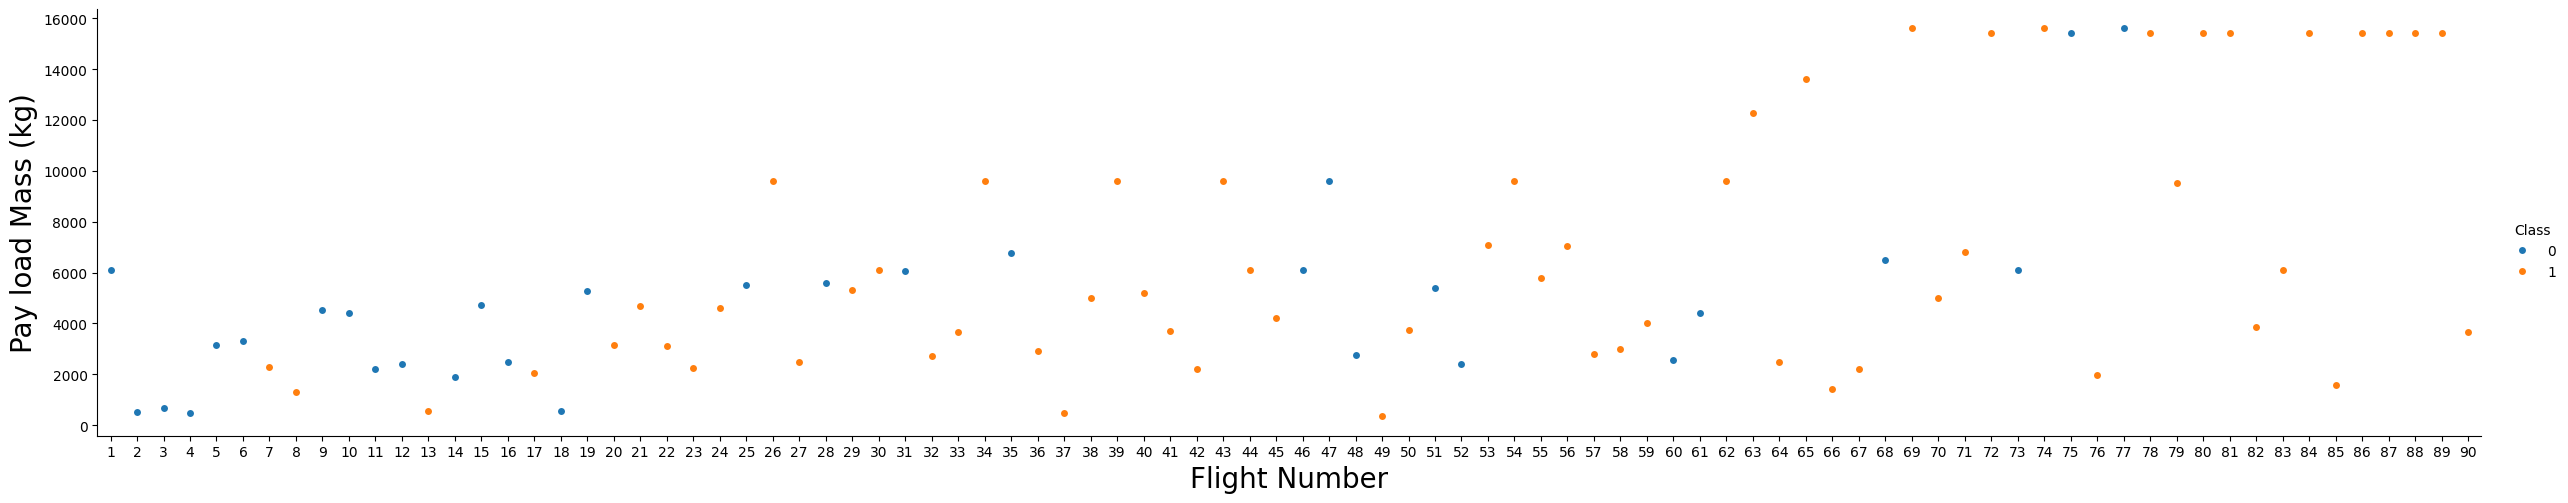

In [ ]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

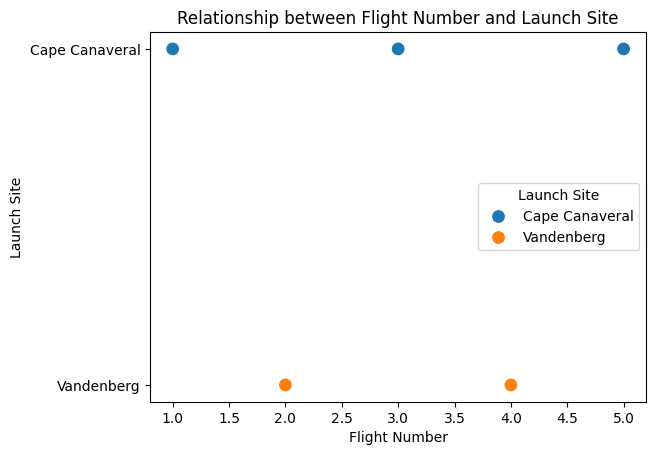

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' containing your data
# with columns 'Flight Number' and 'Launch Site'

# Example data (replace this with your actual data)
data = {
    'Flight Number': [1, 2, 3, 4, 5],
    'Launch Site': ['Cape Canaveral', 'Vandenberg', 'Cape Canaveral', 'Vandenberg', 'Cape Canaveral']
}

df = pd.DataFrame(data)

# Plotting
sns.scatterplot(data=df, x='Flight Number', y='Launch Site', hue='Launch Site', s=100)
plt.title('Relationship between Flight Number and Launch Site')
plt.xlabel('Flight Number')
plt.ylabel('Launch Site')
plt.legend(title='Launch Site')
plt.show()


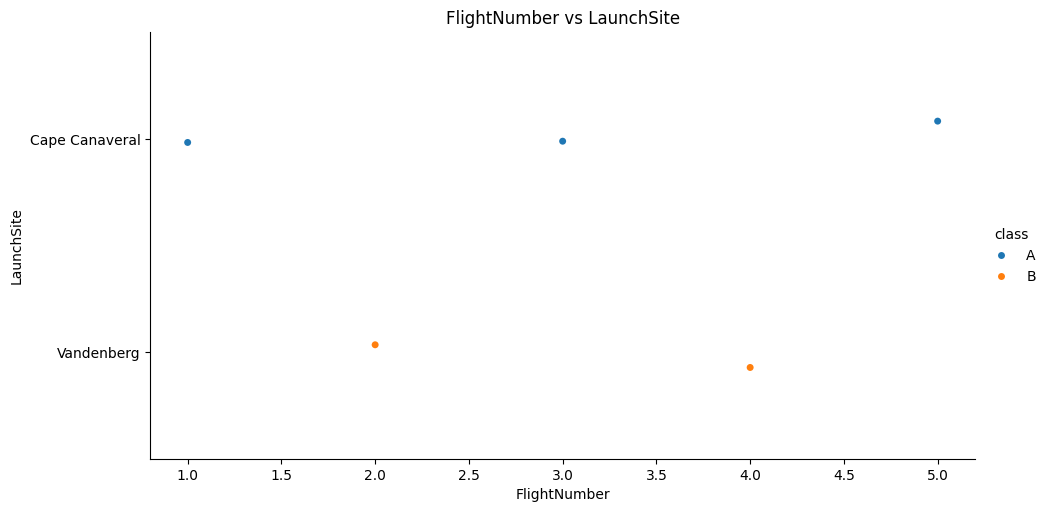

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' containing your data
# with columns 'FlightNumber', 'LaunchSite', and 'class'

# Example data (replace this with your actual data)
data = {
    'FlightNumber': [1, 2, 3, 4, 5],
    'LaunchSite': ['Cape Canaveral', 'Vandenberg', 'Cape Canaveral', 'Vandenberg', 'Cape Canaveral'],
    'class': ['A', 'B', 'A', 'B', 'A']
}

df = pd.DataFrame(data)

# Plotting
sns.catplot(data=df, x='FlightNumber', y='LaunchSite', hue='class', kind='strip', height=5, aspect=2)
plt.title('FlightNumber vs LaunchSite')
plt.xlabel('FlightNumber')
plt.ylabel('LaunchSite')
plt.show()


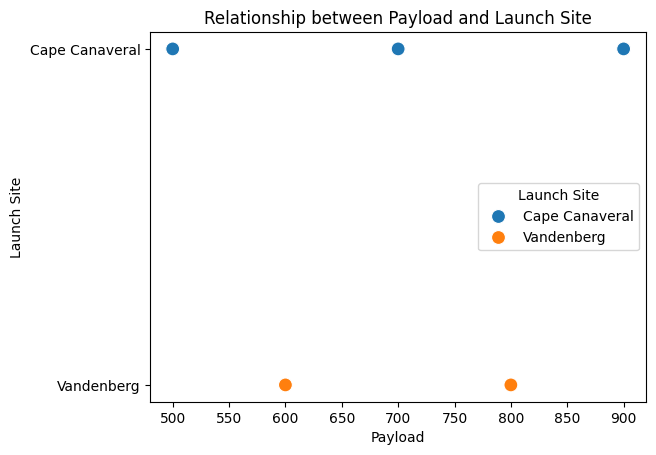

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' containing your data
# with columns 'Payload' and 'Launch Site'

# Example data (replace this with your actual data)
data = {
    'Payload': [500, 600, 700, 800, 900],
    'Launch Site': ['Cape Canaveral', 'Vandenberg', 'Cape Canaveral', 'Vandenberg', 'Cape Canaveral']
}

df = pd.DataFrame(data)

# Plotting a scatter plot
sns.scatterplot(data=df, x='Payload', y='Launch Site', hue='Launch Site', s=100)
plt.title('Relationship between Payload and Launch Site')
plt.xlabel('Payload')
plt.ylabel('Launch Site')
plt.legend(title='Launch Site')
plt.show()


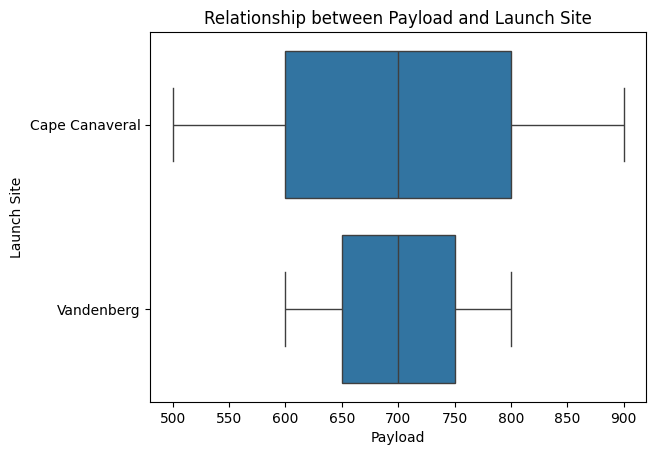

In [ ]:
# Plotting a box plot
sns.boxplot(data=df, x='Payload', y='Launch Site')
plt.title('Relationship between Payload and Launch Site')
plt.xlabel('Payload')
plt.ylabel('Launch Site')
plt.show()


<ipython-input-16-ea335141c13f>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=success_rate, x='Orbit', y='Success', palette='pastel')


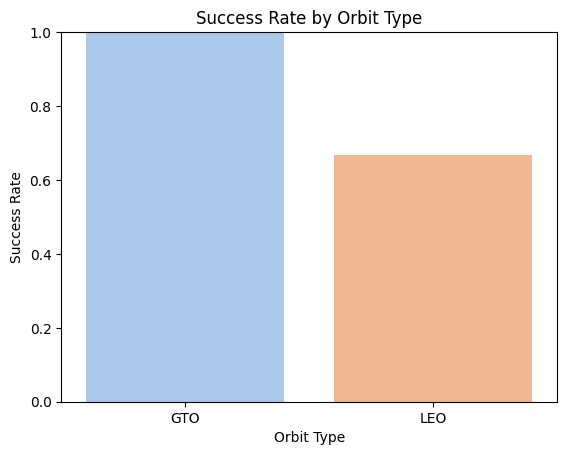

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' containing your data
# with columns 'Orbit' and 'Success'

# Example data (replace this with your actual data)
data = {
    'Orbit': ['LEO', 'GTO', 'LEO', 'GTO', 'LEO'],
    'Success': [True, True, False, True, True]
}

df = pd.DataFrame(data)

# Calculate success rate for each orbit type
success_rate = df.groupby('Orbit')['Success'].mean().reset_index()

# Plotting
sns.barplot(data=success_rate, x='Orbit', y='Success', palette='pastel')
plt.title('Success Rate by Orbit Type')
plt.xlabel('Orbit Type')
plt.ylabel('Success Rate')
plt.ylim(0, 1)  # Setting y-axis limit to ensure the range is from 0 to 1
plt.show()


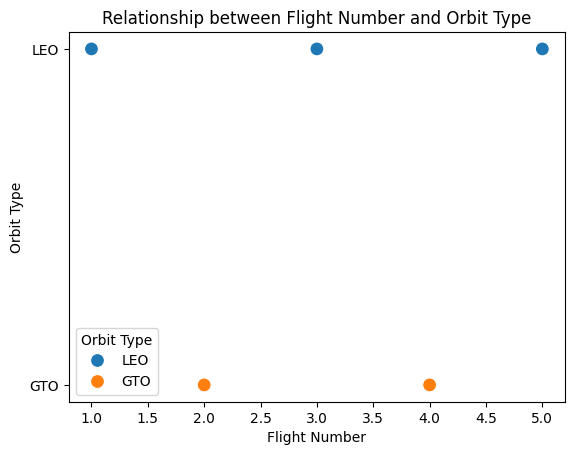

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' containing your data
# with columns 'FlightNumber' and 'Orbit'

# Example data (replace this with your actual data)
data = {
    'FlightNumber': [1, 2, 3, 4, 5],
    'Orbit': ['LEO', 'GTO', 'LEO', 'GTO', 'LEO']
}

df = pd.DataFrame(data)

# Plotting a scatter plot
sns.scatterplot(data=df, x='FlightNumber', y='Orbit', hue='Orbit', s=100)
plt.title('Relationship between Flight Number and Orbit Type')
plt.xlabel('Flight Number')
plt.ylabel('Orbit Type')
plt.legend(title='Orbit Type')
plt.show()


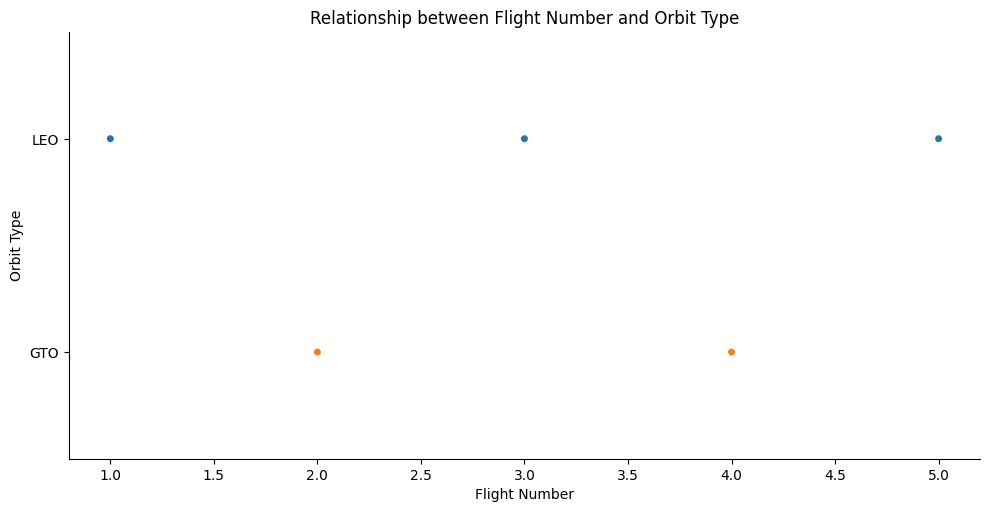

In [ ]:
# Plotting a categorical plot
sns.catplot(data=df, x='FlightNumber', y='Orbit', kind='swarm', hue='Orbit', height=5, aspect=2)
plt.title('Relationship between Flight Number and Orbit Type')
plt.xlabel('Flight Number')
plt.ylabel('Orbit Type')
plt.show()


<ipython-input-20-e2f0b6e8018c>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Orbit', y='Payload', palette='pastel')


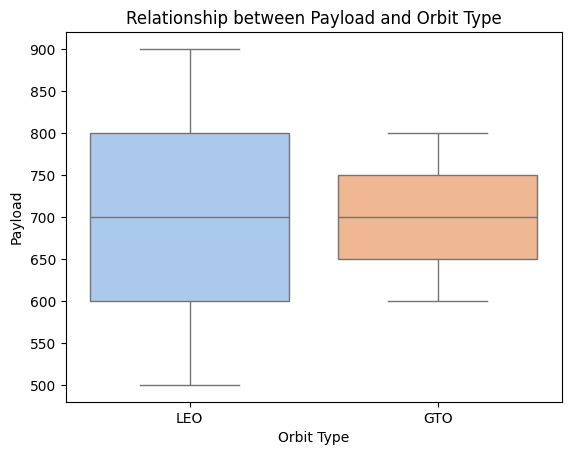

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' containing your data
# with columns 'Payload' and 'Orbit'

# Example data (replace this with your actual data)
data = {
    'Payload': [500, 600, 700, 800, 900],
    'Orbit': ['LEO', 'GTO', 'LEO', 'GTO', 'LEO']
}

df = pd.DataFrame(data)

# Plotting a box plot
sns.boxplot(data=df, x='Orbit', y='Payload', palette='pastel')
plt.title('Relationship between Payload and Orbit Type')
plt.xlabel('Orbit Type')
plt.ylabel('Payload')
plt.show()


<ipython-input-21-ce13846804dc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Orbit', y='Payload', palette='pastel')


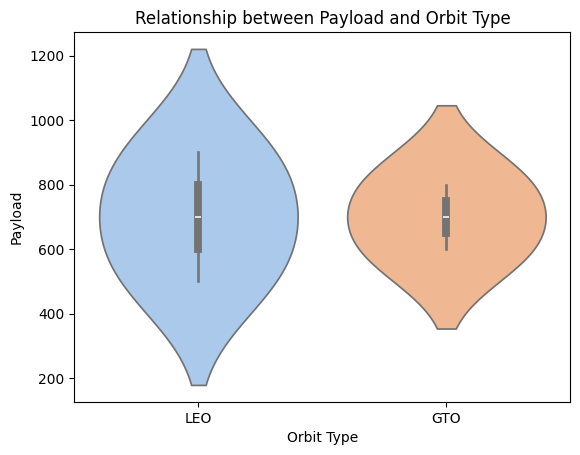

In [ ]:
# Plotting a violin plot
sns.violinplot(data=df, x='Orbit', y='Payload', palette='pastel')
plt.title('Relationship between Payload and Orbit Type')
plt.xlabel('Orbit Type')
plt.ylabel('Payload')
plt.show()


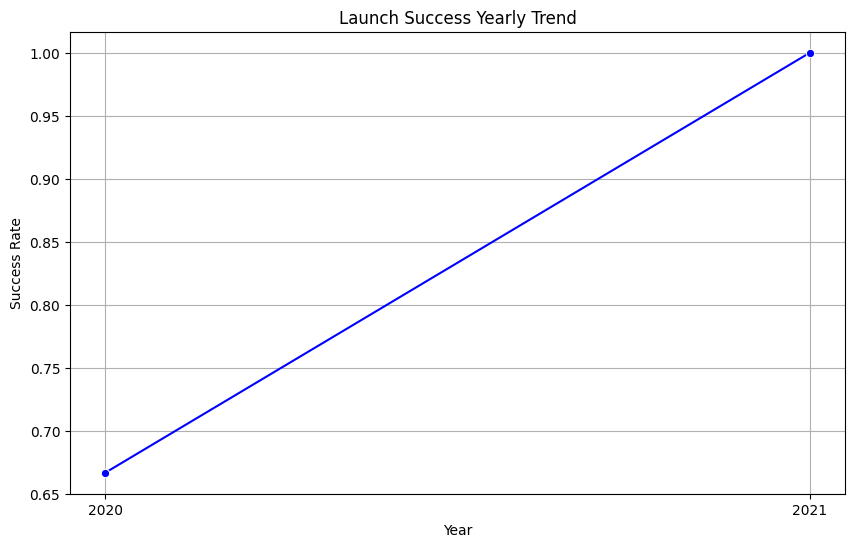

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' containing your data
# with columns 'Date' and 'Success'

# Example data (replace this with your actual data)
data = {
    'Date': ['2020-01-01', '2020-02-01', '2020-03-01', '2021-01-01', '2021-02-01'],
    'Success': [True, False, True, True, True]
}

df = pd.DataFrame(data)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract year from 'Date' column
df['Year'] = df['Date'].dt.year

# Calculate success rate per year
success_rate = df.groupby('Year')['Success'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=success_rate, x='Year', y='Success', marker='o', color='b')
plt.title('Launch Success Yearly Trend')
plt.xlabel('Year')
plt.ylabel('Success Rate')
plt.xticks(success_rate['Year'])  # Set x-axis ticks to display every year
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd

# Assuming you have a DataFrame named 'df' containing your data
# with a column 'Date'

# Example data (replace this with your actual data)
data = {
    'Date': ['2020-01-01', '2020-02-01', '2020-03-01', '2021-01-01', '2021-02-01']
}

df = pd.DataFrame(data)

# Define a function to extract the year from the 'Date' column
def extract_year(date):
    return date.split("-")[0]

# Apply the function to the 'Date' column and create a new column 'Year'
df['Year'] = df['Date'].apply(extract_year)

# Display the DataFrame
print(df.head())



         Date  Year
0  2020-01-01  2020
1  2020-02-01  2020
2  2020-03-01  2020
3  2021-01-01  2021
4  2021-02-01  2021


In [ ]:
import pandas as pd

# Ejemplo de DataFrame con columnas categóricas
data = {
    'Orbit': ['LEO', 'GTO', 'LEO', 'GTO', 'LEO'],
    'LaunchSite': ['CCAFS SLC 40', 'VAFB SLC 4E', 'CCAFS SLC 40', 'VAFB SLC 4E', 'CCAFS SLC 40']
}

df = pd.DataFrame(data)

# Crear variables ficticias para las columnas categóricas
df_encoded = pd.get_dummies(df, columns=['Orbit', 'LaunchSite'])

# Mostrar el DataFrame con las variables ficticias
print(df_encoded)


   Orbit_GTO  Orbit_LEO  LaunchSite_CCAFS SLC 40  LaunchSite_VAFB SLC 4E
0      False       True                     True                   False
1       True      False                    False                    True
2      False       True                     True                   False
3       True      False                    False                    True
4      False       True                     True                   False


In [ ]:
!pip install numpy pandas seaborn


In [ ]:

import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

ModuleNotFoundError: No module named 'piplite'

In [ ]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

In [ ]:
import requests
import pandas as pd
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

# Realizar la solicitud GET a la URL y obtener los datos
response = requests.get(URL)

# Leer los datos en un DataFrame de Pandas
df = pd.read_csv(io.StringIO(response.text))

# Ahora puedes usar el DataFrame `df` para trabajar con tus datos


In [ ]:

df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


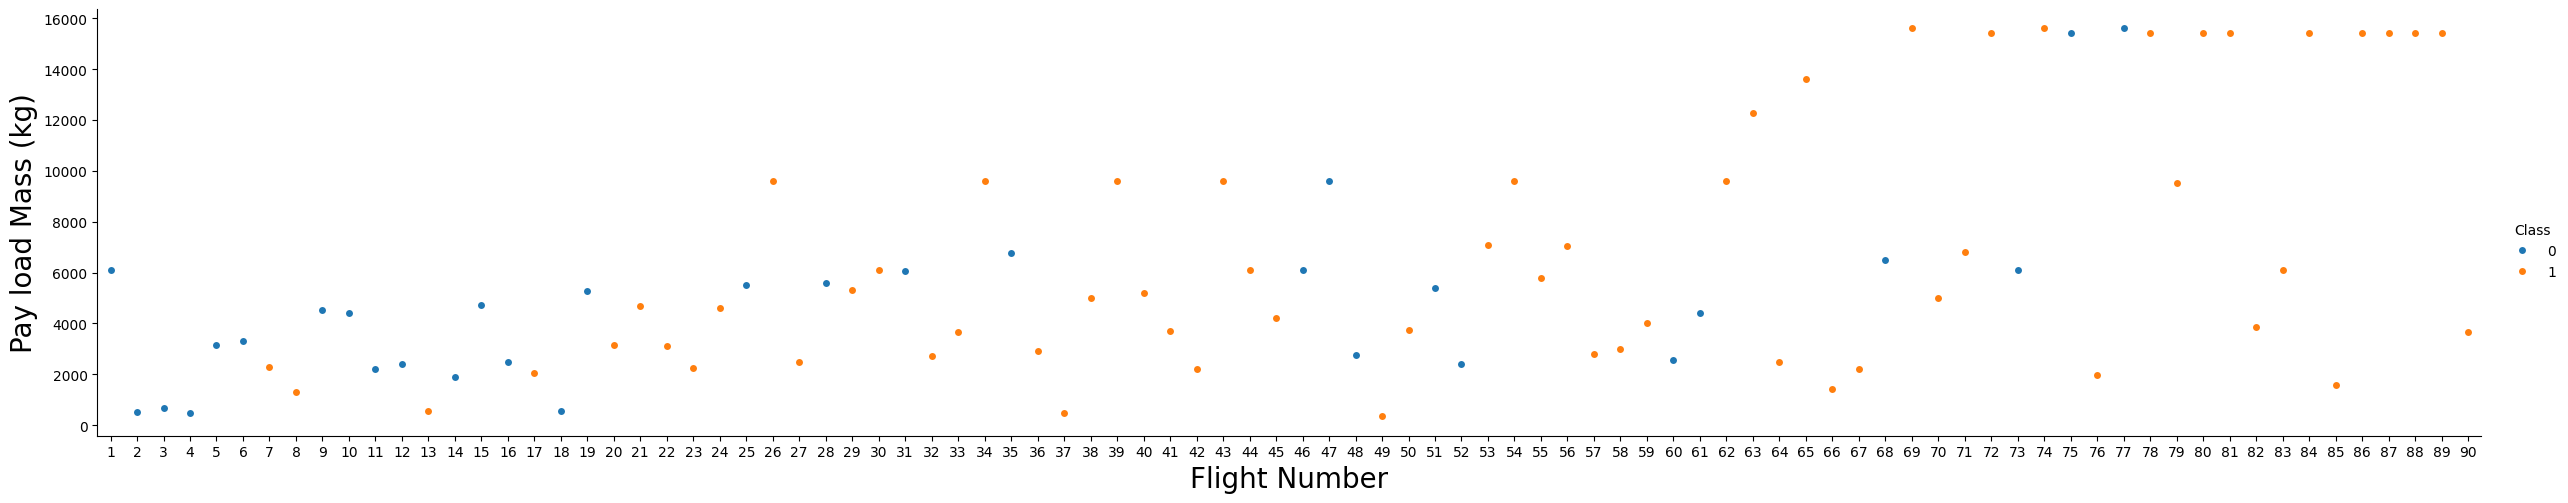

In [ ]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

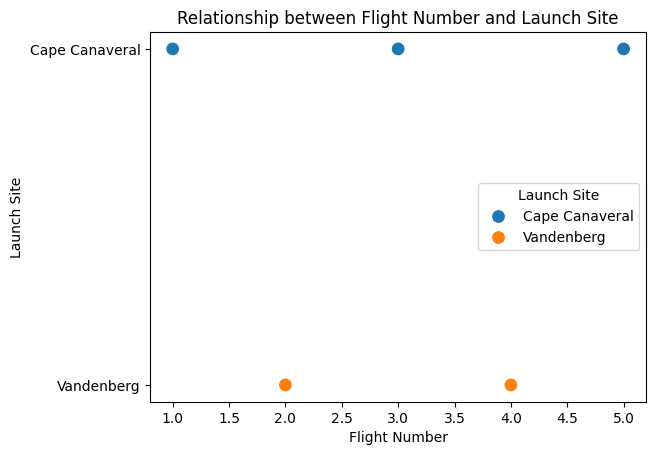

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' containing your data
# with columns 'Flight Number' and 'Launch Site'

# Example data (replace this with your actual data)
data = {
    'Flight Number': [1, 2, 3, 4, 5],
    'Launch Site': ['Cape Canaveral', 'Vandenberg', 'Cape Canaveral', 'Vandenberg', 'Cape Canaveral']
}

df = pd.DataFrame(data)

# Plotting
sns.scatterplot(data=df, x='Flight Number', y='Launch Site', hue='Launch Site', s=100)
plt.title('Relationship between Flight Number and Launch Site')
plt.xlabel('Flight Number')
plt.ylabel('Launch Site')
plt.legend(title='Launch Site')
plt.show()


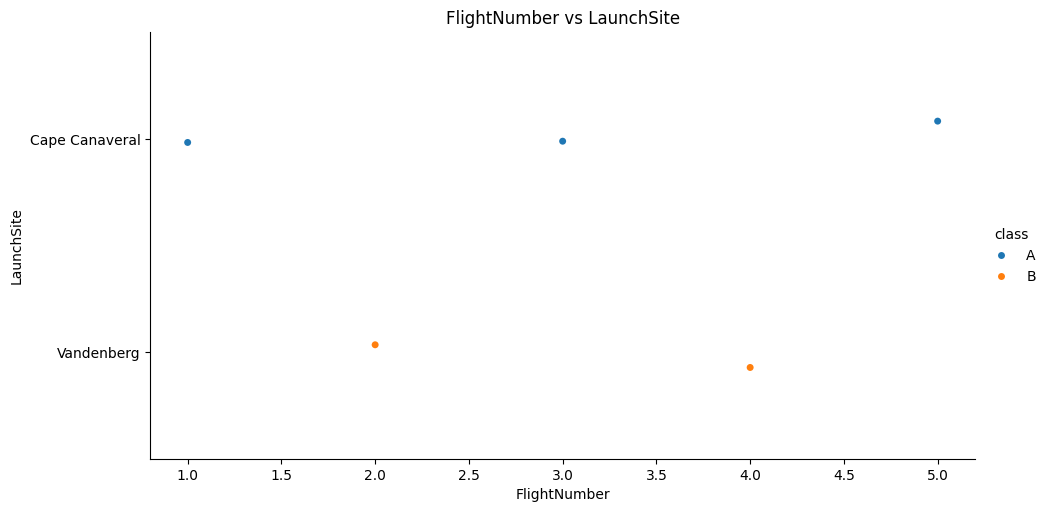

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' containing your data
# with columns 'FlightNumber', 'LaunchSite', and 'class'

# Example data (replace this with your actual data)
data = {
    'FlightNumber': [1, 2, 3, 4, 5],
    'LaunchSite': ['Cape Canaveral', 'Vandenberg', 'Cape Canaveral', 'Vandenberg', 'Cape Canaveral'],
    'class': ['A', 'B', 'A', 'B', 'A']
}

df = pd.DataFrame(data)

# Plotting
sns.catplot(data=df, x='FlightNumber', y='LaunchSite', hue='class', kind='strip', height=5, aspect=2)
plt.title('FlightNumber vs LaunchSite')
plt.xlabel('FlightNumber')
plt.ylabel('LaunchSite')
plt.show()


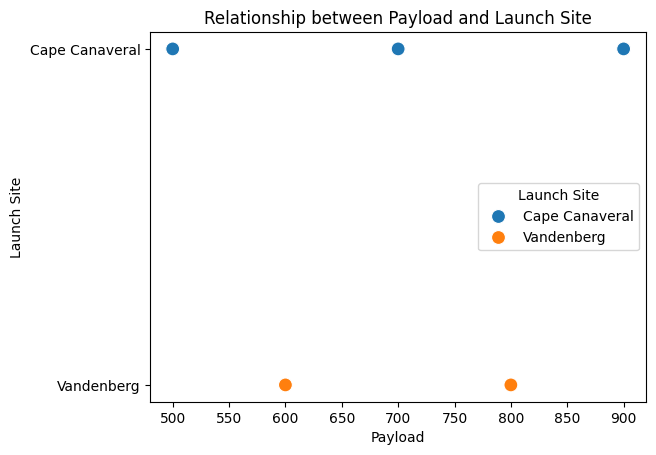

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' containing your data
# with columns 'Payload' and 'Launch Site'

# Example data (replace this with your actual data)
data = {
    'Payload': [500, 600, 700, 800, 900],
    'Launch Site': ['Cape Canaveral', 'Vandenberg', 'Cape Canaveral', 'Vandenberg', 'Cape Canaveral']
}

df = pd.DataFrame(data)

# Plotting a scatter plot
sns.scatterplot(data=df, x='Payload', y='Launch Site', hue='Launch Site', s=100)
plt.title('Relationship between Payload and Launch Site')
plt.xlabel('Payload')
plt.ylabel('Launch Site')
plt.legend(title='Launch Site')
plt.show()


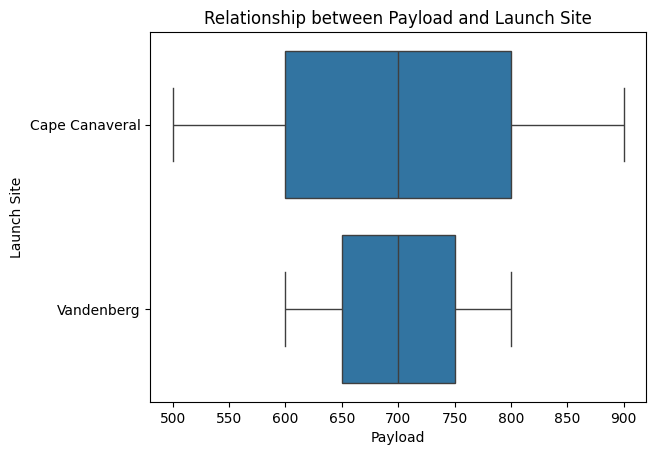

In [ ]:
# Plotting a box plot
sns.boxplot(data=df, x='Payload', y='Launch Site')
plt.title('Relationship between Payload and Launch Site')
plt.xlabel('Payload')
plt.ylabel('Launch Site')
plt.show()


<ipython-input-16-ea335141c13f>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=success_rate, x='Orbit', y='Success', palette='pastel')


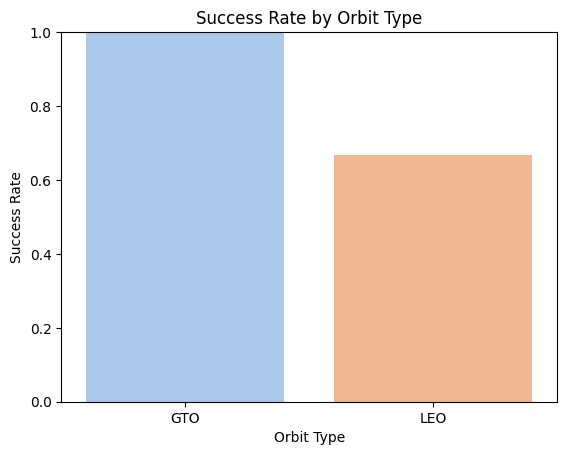

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' containing your data
# with columns 'Orbit' and 'Success'

# Example data (replace this with your actual data)
data = {
    'Orbit': ['LEO', 'GTO', 'LEO', 'GTO', 'LEO'],
    'Success': [True, True, False, True, True]
}

df = pd.DataFrame(data)

# Calculate success rate for each orbit type
success_rate = df.groupby('Orbit')['Success'].mean().reset_index()

# Plotting
sns.barplot(data=success_rate, x='Orbit', y='Success', palette='pastel')
plt.title('Success Rate by Orbit Type')
plt.xlabel('Orbit Type')
plt.ylabel('Success Rate')
plt.ylim(0, 1)  # Setting y-axis limit to ensure the range is from 0 to 1
plt.show()


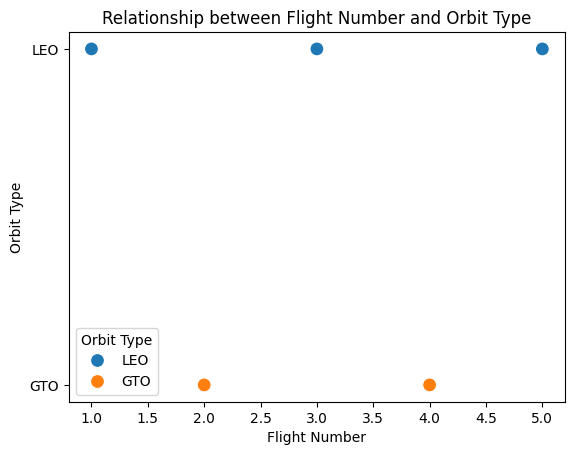

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' containing your data
# with columns 'FlightNumber' and 'Orbit'

# Example data (replace this with your actual data)
data = {
    'FlightNumber': [1, 2, 3, 4, 5],
    'Orbit': ['LEO', 'GTO', 'LEO', 'GTO', 'LEO']
}

df = pd.DataFrame(data)

# Plotting a scatter plot
sns.scatterplot(data=df, x='FlightNumber', y='Orbit', hue='Orbit', s=100)
plt.title('Relationship between Flight Number and Orbit Type')
plt.xlabel('Flight Number')
plt.ylabel('Orbit Type')
plt.legend(title='Orbit Type')
plt.show()


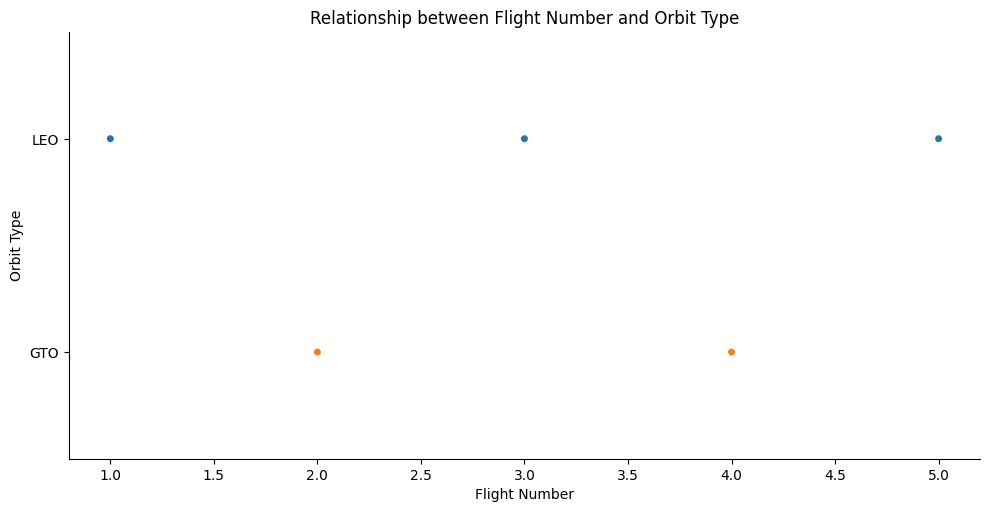

In [ ]:
# Plotting a categorical plot
sns.catplot(data=df, x='FlightNumber', y='Orbit', kind='swarm', hue='Orbit', height=5, aspect=2)
plt.title('Relationship between Flight Number and Orbit Type')
plt.xlabel('Flight Number')
plt.ylabel('Orbit Type')
plt.show()


<ipython-input-20-e2f0b6e8018c>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Orbit', y='Payload', palette='pastel')


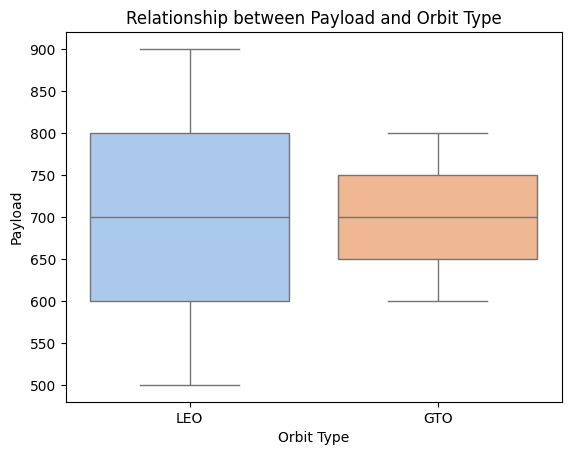

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' containing your data
# with columns 'Payload' and 'Orbit'

# Example data (replace this with your actual data)
data = {
    'Payload': [500, 600, 700, 800, 900],
    'Orbit': ['LEO', 'GTO', 'LEO', 'GTO', 'LEO']
}

df = pd.DataFrame(data)

# Plotting a box plot
sns.boxplot(data=df, x='Orbit', y='Payload', palette='pastel')
plt.title('Relationship between Payload and Orbit Type')
plt.xlabel('Orbit Type')
plt.ylabel('Payload')
plt.show()


<ipython-input-21-ce13846804dc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Orbit', y='Payload', palette='pastel')


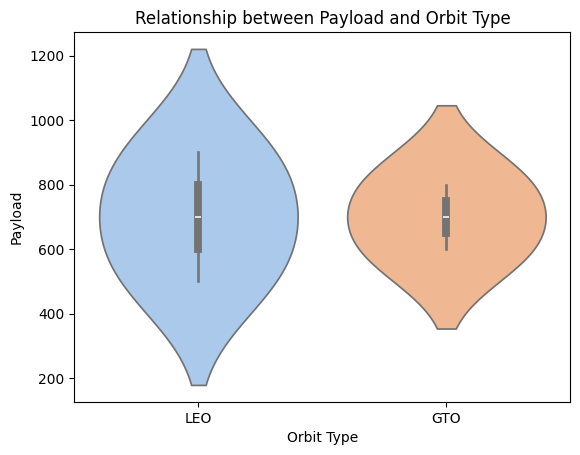

In [ ]:
# Plotting a violin plot
sns.violinplot(data=df, x='Orbit', y='Payload', palette='pastel')
plt.title('Relationship between Payload and Orbit Type')
plt.xlabel('Orbit Type')
plt.ylabel('Payload')
plt.show()


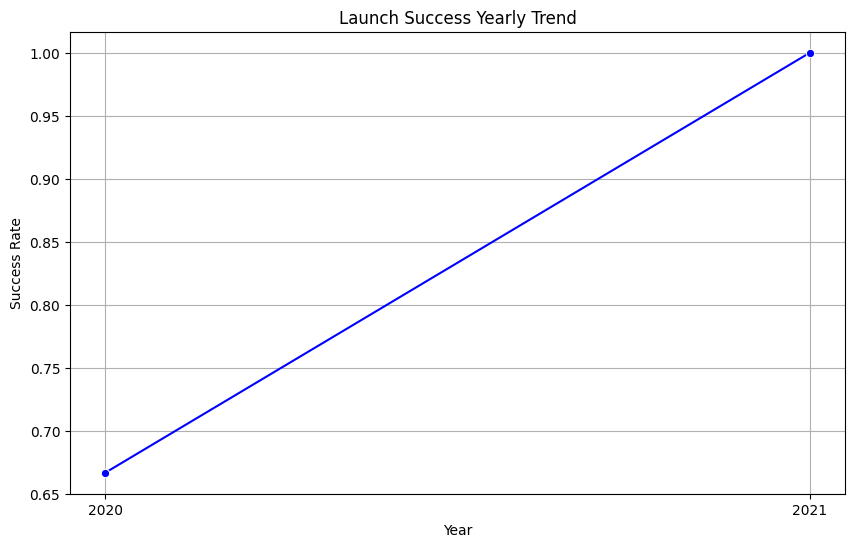

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' containing your data
# with columns 'Date' and 'Success'

# Example data (replace this with your actual data)
data = {
    'Date': ['2020-01-01', '2020-02-01', '2020-03-01', '2021-01-01', '2021-02-01'],
    'Success': [True, False, True, True, True]
}

df = pd.DataFrame(data)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract year from 'Date' column
df['Year'] = df['Date'].dt.year

# Calculate success rate per year
success_rate = df.groupby('Year')['Success'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=success_rate, x='Year', y='Success', marker='o', color='b')
plt.title('Launch Success Yearly Trend')
plt.xlabel('Year')
plt.ylabel('Success Rate')
plt.xticks(success_rate['Year'])  # Set x-axis ticks to display every year
plt.grid(True)
plt.show()


In [ ]:
!pip install numpy pandas seaborn


In [ ]:

import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

ModuleNotFoundError: No module named 'piplite'

In [ ]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

In [ ]:
import requests
import pandas as pd
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

# Realizar la solicitud GET a la URL y obtener los datos
response = requests.get(URL)

# Leer los datos en un DataFrame de Pandas
df = pd.read_csv(io.StringIO(response.text))

# Ahora puedes usar el DataFrame `df` para trabajar con tus datos


In [ ]:

df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


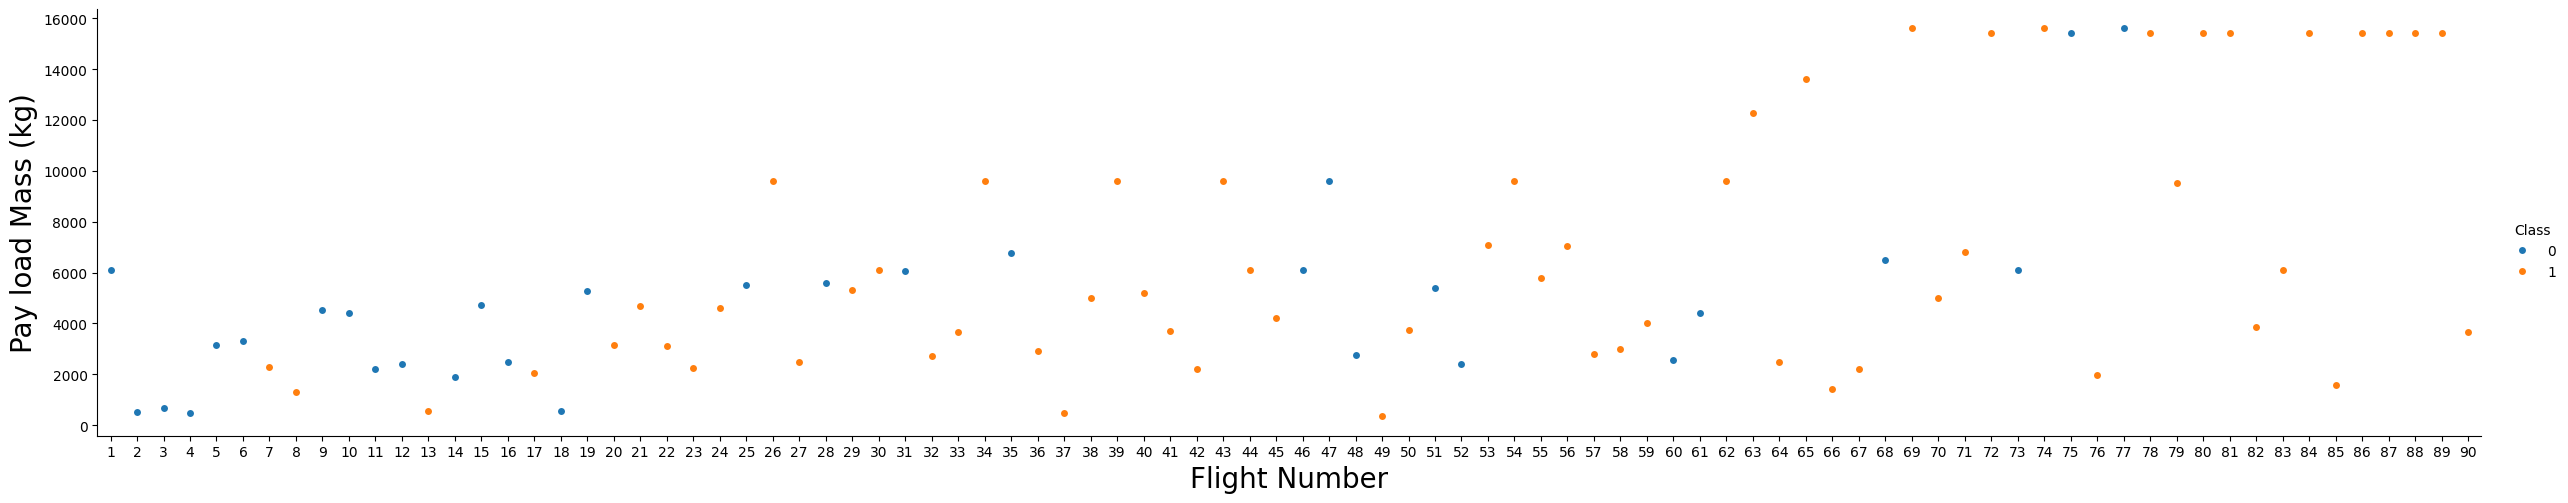

In [ ]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

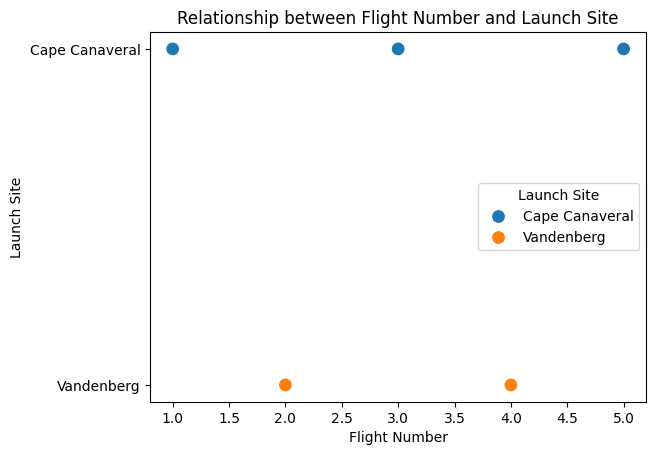

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' containing your data
# with columns 'Flight Number' and 'Launch Site'

# Example data (replace this with your actual data)
data = {
    'Flight Number': [1, 2, 3, 4, 5],
    'Launch Site': ['Cape Canaveral', 'Vandenberg', 'Cape Canaveral', 'Vandenberg', 'Cape Canaveral']
}

df = pd.DataFrame(data)

# Plotting
sns.scatterplot(data=df, x='Flight Number', y='Launch Site', hue='Launch Site', s=100)
plt.title('Relationship between Flight Number and Launch Site')
plt.xlabel('Flight Number')
plt.ylabel('Launch Site')
plt.legend(title='Launch Site')
plt.show()


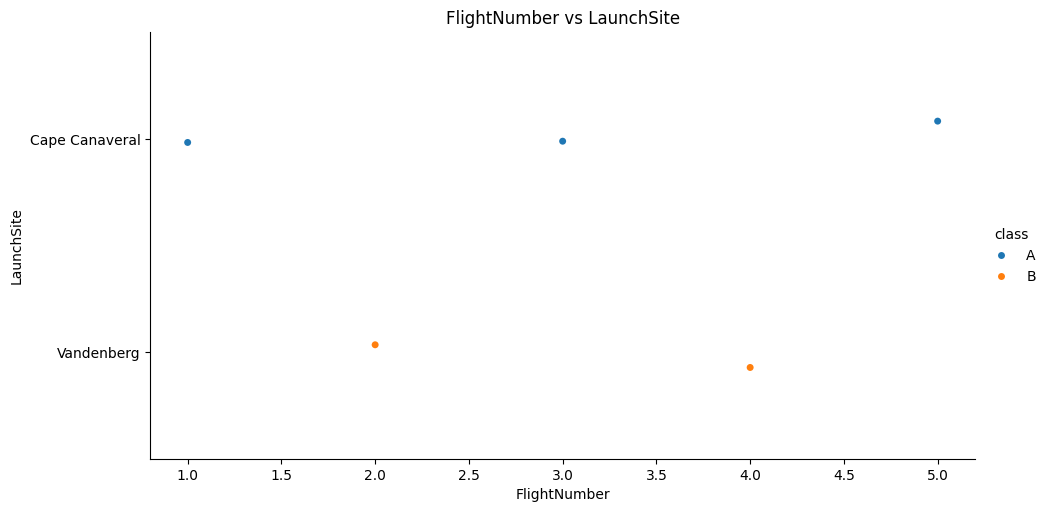

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' containing your data
# with columns 'FlightNumber', 'LaunchSite', and 'class'

# Example data (replace this with your actual data)
data = {
    'FlightNumber': [1, 2, 3, 4, 5],
    'LaunchSite': ['Cape Canaveral', 'Vandenberg', 'Cape Canaveral', 'Vandenberg', 'Cape Canaveral'],
    'class': ['A', 'B', 'A', 'B', 'A']
}

df = pd.DataFrame(data)

# Plotting
sns.catplot(data=df, x='FlightNumber', y='LaunchSite', hue='class', kind='strip', height=5, aspect=2)
plt.title('FlightNumber vs LaunchSite')
plt.xlabel('FlightNumber')
plt.ylabel('LaunchSite')
plt.show()


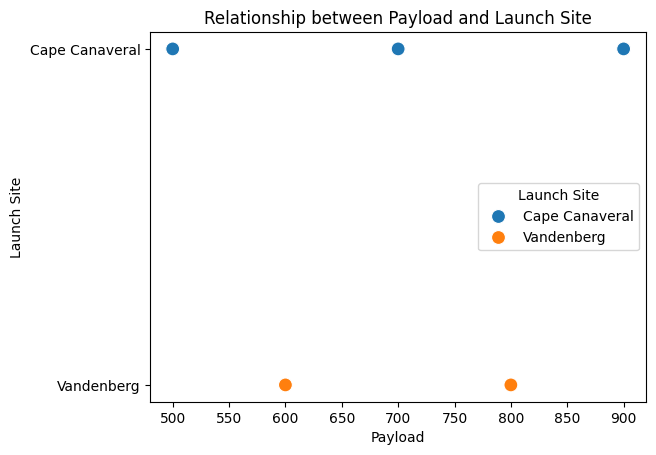

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' containing your data
# with columns 'Payload' and 'Launch Site'

# Example data (replace this with your actual data)
data = {
    'Payload': [500, 600, 700, 800, 900],
    'Launch Site': ['Cape Canaveral', 'Vandenberg', 'Cape Canaveral', 'Vandenberg', 'Cape Canaveral']
}

df = pd.DataFrame(data)

# Plotting a scatter plot
sns.scatterplot(data=df, x='Payload', y='Launch Site', hue='Launch Site', s=100)
plt.title('Relationship between Payload and Launch Site')
plt.xlabel('Payload')
plt.ylabel('Launch Site')
plt.legend(title='Launch Site')
plt.show()


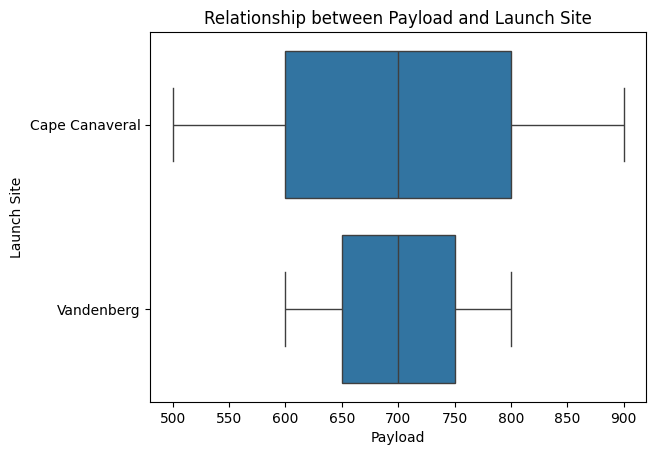

In [ ]:
# Plotting a box plot
sns.boxplot(data=df, x='Payload', y='Launch Site')
plt.title('Relationship between Payload and Launch Site')
plt.xlabel('Payload')
plt.ylabel('Launch Site')
plt.show()


<ipython-input-16-ea335141c13f>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=success_rate, x='Orbit', y='Success', palette='pastel')


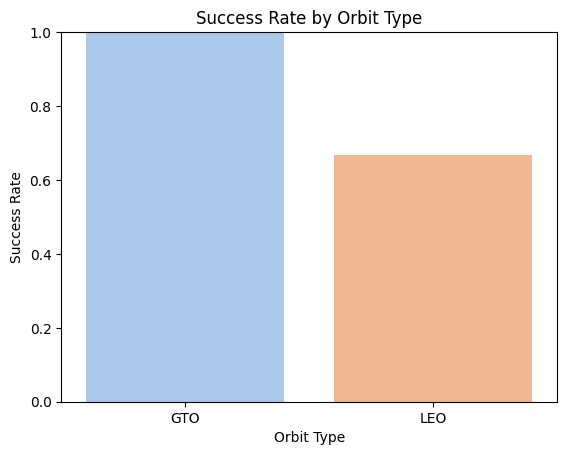

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' containing your data
# with columns 'Orbit' and 'Success'

# Example data (replace this with your actual data)
data = {
    'Orbit': ['LEO', 'GTO', 'LEO', 'GTO', 'LEO'],
    'Success': [True, True, False, True, True]
}

df = pd.DataFrame(data)

# Calculate success rate for each orbit type
success_rate = df.groupby('Orbit')['Success'].mean().reset_index()

# Plotting
sns.barplot(data=success_rate, x='Orbit', y='Success', palette='pastel')
plt.title('Success Rate by Orbit Type')
plt.xlabel('Orbit Type')
plt.ylabel('Success Rate')
plt.ylim(0, 1)  # Setting y-axis limit to ensure the range is from 0 to 1
plt.show()


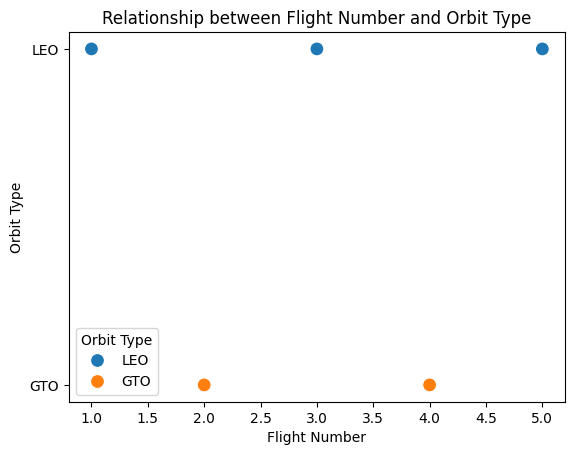

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' containing your data
# with columns 'FlightNumber' and 'Orbit'

# Example data (replace this with your actual data)
data = {
    'FlightNumber': [1, 2, 3, 4, 5],
    'Orbit': ['LEO', 'GTO', 'LEO', 'GTO', 'LEO']
}

df = pd.DataFrame(data)

# Plotting a scatter plot
sns.scatterplot(data=df, x='FlightNumber', y='Orbit', hue='Orbit', s=100)
plt.title('Relationship between Flight Number and Orbit Type')
plt.xlabel('Flight Number')
plt.ylabel('Orbit Type')
plt.legend(title='Orbit Type')
plt.show()


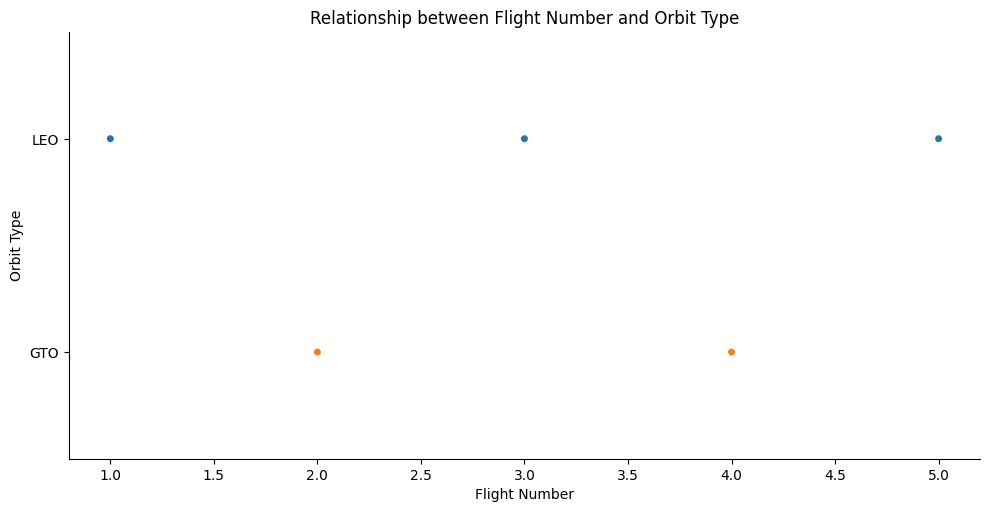

In [ ]:
# Plotting a categorical plot
sns.catplot(data=df, x='FlightNumber', y='Orbit', kind='swarm', hue='Orbit', height=5, aspect=2)
plt.title('Relationship between Flight Number and Orbit Type')
plt.xlabel('Flight Number')
plt.ylabel('Orbit Type')
plt.show()


<ipython-input-20-e2f0b6e8018c>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Orbit', y='Payload', palette='pastel')


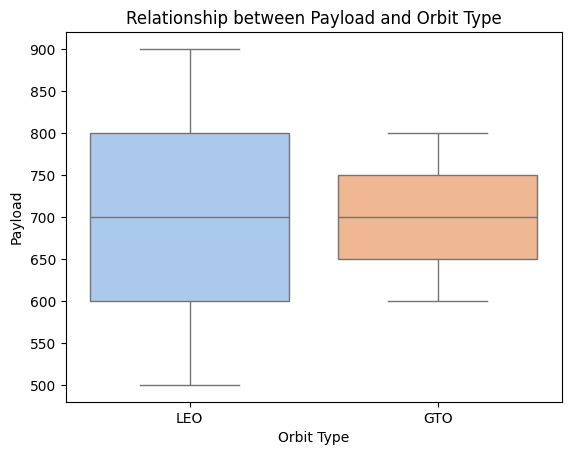

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' containing your data
# with columns 'Payload' and 'Orbit'

# Example data (replace this with your actual data)
data = {
    'Payload': [500, 600, 700, 800, 900],
    'Orbit': ['LEO', 'GTO', 'LEO', 'GTO', 'LEO']
}

df = pd.DataFrame(data)

# Plotting a box plot
sns.boxplot(data=df, x='Orbit', y='Payload', palette='pastel')
plt.title('Relationship between Payload and Orbit Type')
plt.xlabel('Orbit Type')
plt.ylabel('Payload')
plt.show()


<ipython-input-21-ce13846804dc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Orbit', y='Payload', palette='pastel')


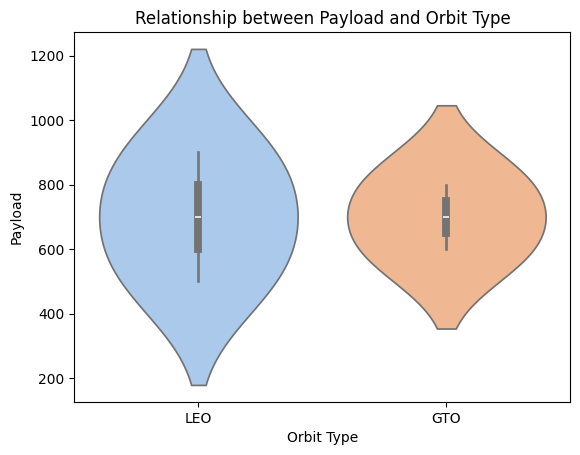

In [ ]:
# Plotting a violin plot
sns.violinplot(data=df, x='Orbit', y='Payload', palette='pastel')
plt.title('Relationship between Payload and Orbit Type')
plt.xlabel('Orbit Type')
plt.ylabel('Payload')
plt.show()


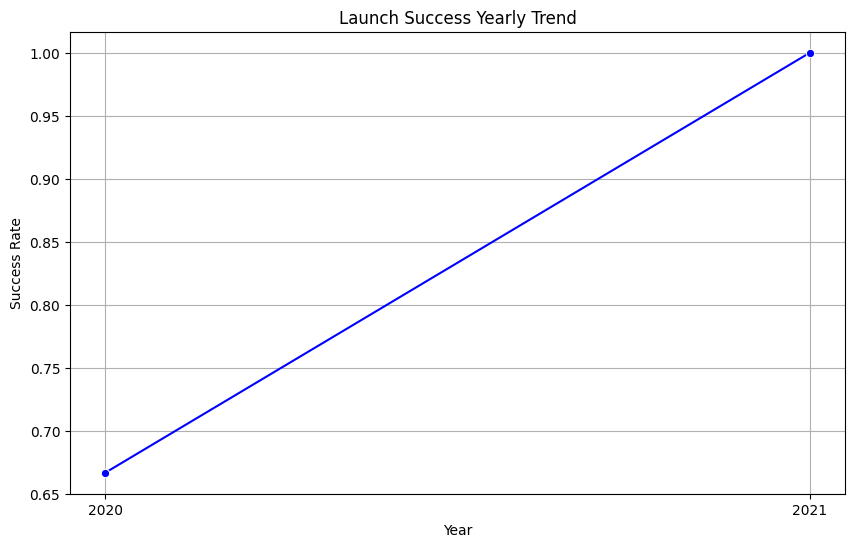

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' containing your data
# with columns 'Date' and 'Success'

# Example data (replace this with your actual data)
data = {
    'Date': ['2020-01-01', '2020-02-01', '2020-03-01', '2021-01-01', '2021-02-01'],
    'Success': [True, False, True, True, True]
}

df = pd.DataFrame(data)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract year from 'Date' column
df['Year'] = df['Date'].dt.year

# Calculate success rate per year
success_rate = df.groupby('Year')['Success'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=success_rate, x='Year', y='Success', marker='o', color='b')
plt.title('Launch Success Yearly Trend')
plt.xlabel('Year')
plt.ylabel('Success Rate')
plt.xticks(success_rate['Year'])  # Set x-axis ticks to display every year
plt.grid(True)
plt.show()


In [78]:
import pandas as pd

# URL del archivo CSV
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_geo.csv'

# Cargar el archivo CSV en un DataFrame
spacex_df = pd.read_csv(url)

# Mostrar las primeras filas del DataFrame para verificar que se cargaron correctamente
print(spacex_df.head())

   Flight Number        Date Time (UTC) Booster Version  Launch Site  \
0              1  2010-06-04   18:45:00  F9 v1.0  B0003  CCAFS LC-40   
1              2  2010-12-08   15:43:00  F9 v1.0  B0004  CCAFS LC-40   
2              3  2012-05-22    7:44:00  F9 v1.0  B0005  CCAFS LC-40   
3              4  2012-10-08    0:35:00  F9 v1.0  B0006  CCAFS LC-40   
4              5  2013-03-01   15:10:00  F9 v1.0  B0007  CCAFS LC-40   

                                                          Payload  \
0                            Dragon Spacecraft Qualification Unit   
1  Dragon demo flight C1, two CubeSats,  barrel of Brouère cheese   
2                                          Dragon demo flight C2+   
3                                                    SpaceX CRS-1   
4                                                    SpaceX CRS-2   

   Payload Mass (kg)      Orbit         Customer        Landing Outcome  \
0                0.0        LEO           SpaceX  Failure   (parachute)   
1 

In [79]:
# Select relevant sub-columns: `Launch Site`, `Lat(Latitude)`, `Long(Longitude)`, `class`
spacex_df = spacex_df[['Launch Site', 'Lat', 'Long', 'class']]
launch_sites_df = spacex_df.groupby(['Launch Site'], as_index=False).first()
launch_sites_df = launch_sites_df[['Launch Site', 'Lat', 'Long']]
launch_sites_df

,Launch Site,Lat,Long
0,CCAFS LC-40,28.562302,-80.577356
1,CCAFS SLC-40,28.563197,-80.576820
2,KSC LC-39A,28.573255,-80.646895
3,VAFB SLC-4E,34.632834,-120.610745


In [80]:
pip install folium

In [81]:
import folium

# Coordenadas del Centro Espacial Johnson de la NASA
nasa_coordinate = [29.559684888503615, -95.0830971930759]

# Crear el mapa con Folium
site_map = folium.Map(location=nasa_coordinate, zoom_start=10)

# Mostrar el mapa
site_map

In [82]:
import folium

# Coordenadas del Centro Espacial Johnson de la NASA
nasa_coordinate = [29.559684888503615, -95.0830971930759]

# Crear el mapa con Folium
site_map = folium.Map(location=nasa_coordinate, zoom_start=10)

# Crear un círculo rojo en las coordenadas del Centro Espacial Johnson de la NASA
circle = folium.Circle(nasa_coordinate, radius=1000, color='#d35400', fill=True).add_child(folium.Popup('NASA Johnson Space Center'))
site_map.add_child(circle)

# Crear un marcador azul en las coordenadas del Centro Espacial Johnson de la NASA
marker = folium.Marker(
    location=nasa_coordinate,
    icon=folium.DivIcon(
        icon_size=(20, 20),
        icon_anchor=(0, 0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'NASA JSC',
        )
    )
site_map.add_child(marker)

# Mostrar el mapa
site_map


In [83]:
import pandas as pd

# Suponiendo que spacex_df es tu DataFrame
column_names = spacex_df.columns

print(column_names)


Index(['Launch Site', 'Lat', 'Long', 'class'], dtype='object')


In [84]:
# Initial the map
site_map = folium.Map(location=nasa_coordinate, zoom_start=5)
# For each launch site, add a Circle object based on its coordinate (Lat, Long) values. In addition, add Launch site name as a popup label


In [85]:
spacex_df.tail(10)

,Launch Site,Lat,Long,class
46,KSC LC-39A,28.573255,-80.646895,1
47,KSC LC-39A,28.573255,-80.646895,1
48,KSC LC-39A,28.573255,-80.646895,1
49,CCAFS SLC-40,28.563197,-80.576820,1
50,CCAFS SLC-40,28.563197,-80.576820,1
51,CCAFS SLC-40,28.563197,-80.576820,0
52,CCAFS SLC-40,28.563197,-80.576820,0
53,CCAFS SLC-40,28.563197,-80.576820,0
54,CCAFS SLC-40,28.563197,-80.576820,1
55,CCAFS SLC-40,28.563197,-80.576820,0


In [86]:
import folium
from folium.plugins import MarkerCluster

# Crear el mapa
site_map = folium.Map(location=nasa_coordinate, zoom_start=5)

# Crear un objeto MarkerCluster
marker_cluster = MarkerCluster().add_to(site_map)

# Iterar sobre cada fila del DataFrame spacex_df
for index, row in spacex_df.iterrows():
    # Obtener las coordenadas del sitio de lanzamiento
    launch_coordinate = [row['Lat'], row['Long']]

    # Definir el color del marcador según si el lanzamiento fue exitoso o fallido
    if row['class'] == 1:
        marker_color = 'green'  # Lanzamiento exitoso
    else:
        marker_color = 'red'  # Lanzamiento fallido

    # Crear un marcador con el color correspondiente
    marker = folium.Marker(location=launch_coordinate, icon=folium.Icon(color=marker_color))

    # Agregar el marcador al objeto MarkerCluster
    marker.add_to(marker_cluster)

# Mostrar el mapa
site_map

In [87]:
marker_cluster = MarkerCluster()

In [88]:
# Crear un mapa con Folium
site_map = folium.Map(location=nasa_coordinate, zoom_start=5)

# Iterar sobre cada fila del DataFrame launch_sites_df
for index, row in launch_sites_df.iterrows():
    # Coordenadas del sitio de lanzamiento
    launch_coordinate = [row['Lat'], row['Long']]

    # Crear un círculo para el sitio de lanzamiento con un radio de 1000 metros
    circle = folium.Circle(launch_coordinate, radius=1000, color='blue', fill=True).add_child(folium.Popup(row['Launch Site']))
    site_map.add_child(circle)

# Mostrar el mapa
site_map

In [90]:
# Add marker_cluster to current site_map
site_map.add_child(marker_cluster)

# for each row in spacex_df data frame
# create a Marker object with its coordinate
# and customize the Marker's icon property to indicate if this launch was successed or failed,
# e.g., icon=folium.Icon(color='white', icon_color=row['marker_color']
for index, record in spacex_df.iterrows():
    # TODO: Create and add a Marker cluster to the site map
    # marker = folium.Marker(...)
    marker_cluster.add_child(marker)

site_map

In [92]:
from math import radians, sin, cos, sqrt, atan2

def haversine_distance(lat1, lon1, lat2, lon2):
    # Convertir grados a radianes
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Distancias de diferencias de latitud y longitud
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Aplicar la fórmula de la distancia haversine
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    distance = 6371 * c  # Radio de la Tierra en kilómetros

    return distance

# Coordenadas del sitio de lanzamiento y de sus proximidades
launch_site_lat = 28.5721
launch_site_lon = -80.648
proximity_lat = 28.5633
proximity_lon = -80.5768

# Calcular la distancia entre el sitio de lanzamiento y su proximidad
distance = haversine_distance(launch_site_lat, launch_site_lon, proximity_lat, proximity_lon)
print("Distance between launch site and proximity:", distance, "km")


Distance between launch site and proximity: 7.0217107651720765 km


In [93]:
from folium.plugins import MousePosition

# Add Mouse Position to get the coordinate (Lat, Long) for a mouse over on the map
formatter = "function(num) {return L.Util.formatNum(num, 5);};"
mouse_position = MousePosition(
    position='topright',
    separator=' Long: ',
    empty_string='NaN',
    lng_first=False,
    num_digits=20,
    prefix='Lat:',
    lat_formatter=formatter,
    lng_formatter=formatter,
)

site_map.add_child(mouse_position)
site_map


In [94]:
from math import sin, cos, sqrt, atan2, radians

def calculate_distance(lat1, lon1, lat2, lon2):
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

In [95]:
print (distance)

7.0217107651720765


In [102]:
wget ="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_dash.csv"

In [103]:
wget2= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/spacex_dash_app.py"

In [105]:
pip install dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 18.9 MB/s eta 0:00:00


In [106]:
# En el archivo spacex_dash_app.py

# Importar las bibliotecas necesarias
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd

# Cargar los datos de SpaceX
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_dash.csv")

# Inicializar la aplicación Dash
app = dash.Dash(__name__)

# Definir el diseño de la aplicación
app.layout = html.Div([
    # Componente de entrada desplegable para el sitio de lanzamiento
    dcc.Dropdown(
        id='site-dropdown',
        options=[{'label': i, 'value': i} for i in df['Launch Site'].unique()],
        value='All Sites',
        placeholder="Select a Launch Site",
        searchable=True
    ),
    # Otros componentes y gráficos aquí...
])

# Ejecutar la aplicación Dash
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [107]:
# En el archivo spacex_dash_app.py

# Definir la función de devolución de llamada para el gráfico circular
@app.callback(
    Output(component_id='success-pie-chart', component_property='figure'),
    [Input(component_id='site-dropdown', component_property='value')]
)
def render_pie_chart(selected_site):
    if selected_site == 'All Sites':
        fig = px.pie(df, values='class', names='Launch Site')
    else:
        fig = px.pie(df[df['Launch Site'] == selected_site], values='class', names='class')
    return fig


In [109]:
dcc.RangeSlider(
    id='payload-slider',
    min=int(df['Payload Mass (kg)'].min()),
    max=int(df['Payload Mass (kg)'].max()),
    value=[int(df['Payload Mass (kg)'].min()), int(df['Payload Mass (kg)'].max())],
    marks={i: str(i) for i in range(int(df['Payload Mass (kg)'].min()), int(df['Payload Mass (kg)'].max()) + 1, 1000)}
)


RangeSlider(min=0, max=9600, marks={0: '0', 1000: '1000', 2000: '2000', 3000: '3000', 4000: '4000', 5000: '5000', 6000: '6000', 7000: '7000', 8000: '8000', 9000: '9000'}, value=[0, 9600], id='payload-slider')

In [110]:
# En el archivo spacex_dash_app.py

# Definir la función de devolución de llamada para el gráfico de dispersión
@app.callback(
    Output(component_id='success-scatter-chart', component_property='figure'),
    [Input(component_id='payload-slider', component_property='value')]
)
def render_scatter_chart(payload_range):
    filtered_df = df[(df['Payload Mass (kg)'] >= payload_range[0]) & (df['Payload Mass (kg)'] <= payload_range[1])]
    fig = px.scatter(filtered_df, x='Payload Mass (kg)', y='class', color='Booster Version')
    return fig


In [112]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [113]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

In [114]:
import requests

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

response = requests.get(URL1)

if response.status_code == 200:
    resp1 = response.text
    print("Datos obtenidos exitosamente.")
else:
    print("Error al obtener los datos. Código de estado:", response.status_code)

Datos obtenidos exitosamente.


In [115]:
import requests

URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'

response = requests.get(URL2)

if response.status_code == 200:
    resp2 = response.text
    print("Datos obtenidos exitosamente.")
else:
    print("Error al obtener los datos. Código de estado:", response.status_code)


Datos obtenidos exitosamente.


In [116]:
import pandas as pd

# Definir las URLs
URL1 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv'
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'

# Función para cargar datos desde una URL y crear un DataFrame
def cargar_datos(url):
    try:
        # Cargar los datos desde la URL en un DataFrame
        df = pd.read_csv(url)
        print("Datos cargados exitosamente desde", url)
        return df
    except Exception as e:
        print("Error al cargar los datos desde", url, ":", e)
        return None

# Cargar datos desde la primera URL
df1 = cargar_datos(URL1)

# Cargar datos desde la segunda URL
df2 = cargar_datos(URL2)

# Verificar si los DataFrames se cargaron correctamente
if df1 is not None:
    print("Primer DataFrame:")
    print(df1.head())
    print("\n")
else:
    print("No se pudo cargar el primer DataFrame.")

if df2 is not None:
    print("Segundo DataFrame:")
    print(df2.head())
    print("\n")
else:
    print("No se pudo cargar el segundo DataFrame.")


Datos cargados exitosamente desde https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv
Datos cargados exitosamente desde https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv
Primer DataFrame:
   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False       

In [117]:
import numpy as np

# Obtener la columna "Class" como un array NumPy
Y = df1['Class'].to_numpy()

# Verificar si Y es una serie de Pandas
print(type(Y))

# Si es necesario convertir Y a una serie de Pandas
Y = df1['Class']

# Verificar si Y es una serie de Pandas
print(type(Y))


<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


In [118]:
  from sklearn.preprocessing import StandardScaler

# Crear un objeto StandardScaler
scaler = StandardScaler()

# Seleccionar las columnas numéricas para estandarizar
numerical_columns = df2.select_dtypes(include=np.number).columns

# Estandarizar los datos en X y reasignarlo a X
df2[numerical_columns] = scaler.fit_transform(df2[numerical_columns])

# Verificar el resultado
print(df2.head())


   FlightNumber   PayloadMass   Flights     Block  ReusedCount  Orbit_ES-L1  \
0     -1.712912 -1.948145e-16 -0.653913 -1.575895     -0.97344       -0.106   
1     -1.674419 -1.195232e+00 -0.653913 -1.575895     -0.97344       -0.106   
2     -1.635927 -1.162673e+00 -0.653913 -1.575895     -0.97344       -0.106   
3     -1.597434 -1.200587e+00 -0.653913 -1.575895     -0.97344       -0.106   
4     -1.558942 -6.286706e-01 -0.653913 -1.575895     -0.97344       -0.106   

   Orbit_GEO  Orbit_GTO  Orbit_HEO  Orbit_ISS  Orbit_LEO  Orbit_MEO  Orbit_PO  \
0     -0.106  -0.654654     -0.106  -0.551677   3.443420  -0.185695 -0.333333   
1     -0.106  -0.654654     -0.106  -0.551677   3.443420  -0.185695 -0.333333   
2     -0.106  -0.654654     -0.106   1.812654  -0.290409  -0.185695 -0.333333   
3     -0.106  -0.654654     -0.106  -0.551677  -0.290409  -0.185695  3.000000   
4     -0.106   1.527525     -0.106  -0.551677  -0.290409  -0.185695 -0.333333   

   Orbit_SO  Orbit_SSO  Orbit_VLEO  La

In [119]:
transform = preprocessing.StandardScaler()

In [120]:
from sklearn.model_selection import train_test_split

# Establecer el tamaño del conjunto de prueba y la semilla aleatoria
test_size = 0.2
random_state = 2

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(df2, Y, test_size=test_size, random_state=random_state)

# Verificar las dimensiones de los conjuntos de entrenamiento y prueba
print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de X_test:", X_test.shape)
print("Dimensiones de Y_train:", Y_train.shape)
print("Dimensiones de Y_test:", Y_test.shape)


Dimensiones de X_train: (72, 83)
Dimensiones de X_test: (18, 83)
Dimensiones de Y_train: (72,)
Dimensiones de Y_test: (18,)


In [121]:
Y_test.shape

(18,)

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Crear un objeto de regresión logística
logreg = LogisticRegression()

# Definir el diccionario de parámetros para la búsqueda de hiperparámetros
parameters = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

# Crear un objeto GridSearchCV
logreg_cv = GridSearchCV(logreg, parameters, cv=10)

# Ajustar el objeto GridSearchCV para encontrar los mejores parámetros
logreg_cv.fit(X_train, Y_train)

# Imprimir los mejores parámetros encontrados
print("Mejores parámetros encontrados:", logreg_cv.best_params_)

Mejores parámetros encontrados: {'C': 0.01, 'penalty': 'l2'}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Sol

In [123]:
parameters = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2']}

In [124]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [125]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()

In [126]:
# Imprimir los mejores parámetros encontrados
print("Mejores parámetros encontrados:", logreg_cv.best_params_)

# Imprimir la precisión (accuracy) en los datos de validación
print("Precisión en los datos de validación:", logreg_cv.best_score_)

Mejores parámetros encontrados: {'C': 0.01, 'penalty': 'l2'}
Precisión en los datos de validación: 0.8464285714285713


In [127]:
# Calcular la precisión en los datos de prueba
test_accuracy = logreg_cv.score(X_test, Y_test)

# Imprimir la precisión en los datos de prueba
print("Precisión en los datos de prueba:", test_accuracy)

Precisión en los datos de prueba: 0.8333333333333334


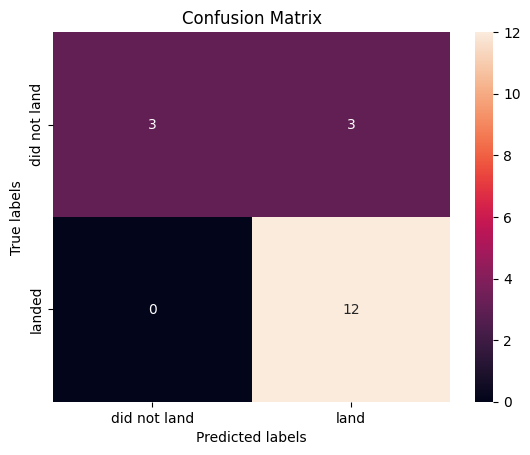

In [128]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [129]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [130]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Crear un objeto SVM
svm = SVC()

# Definir el diccionario de parámetros para la búsqueda de hiperparámetros
parameters = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Crear un objeto GridSearchCV para SVM
svm_cv = GridSearchCV(svm, parameters, cv=10)

# Ajustar el objeto GridSearchCV para encontrar los mejores parámetros
svm_cv.fit(X_train, Y_train)

# Imprimir los mejores parámetros encontrados
print("Mejores parámetros encontrados:", svm_cv.best_params_)


Mejores parámetros encontrados: {'C': 1, 'kernel': 'rbf'}


In [131]:
# Calcular la precisión en los datos de prueba
test_accuracy_svm = svm_cv.score(X_test, Y_test)

# Imprimir la precisión en los datos de prueba
print("Precisión en los datos de prueba:", test_accuracy_svm)


Precisión en los datos de prueba: 0.7777777777777778


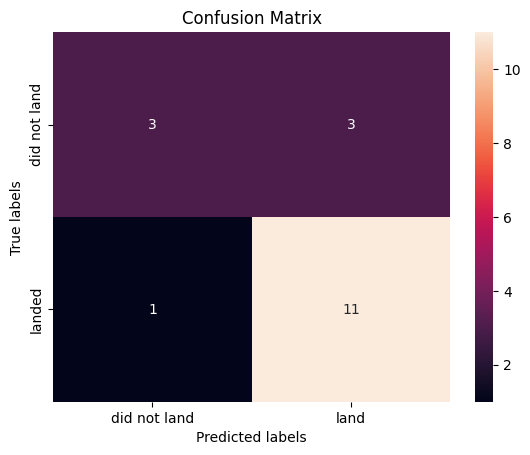

In [132]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [133]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [134]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Crear un objeto DecisionTreeClassifier
tree = DecisionTreeClassifier()

# Definir el diccionario de parámetros para la búsqueda de hiperparámetros
parameters = {'max_depth': [1, 5, 10, 20], 'min_samples_split': [2, 5, 10, 20]}

# Crear un objeto GridSearchCV para el árbol de decisión
tree_cv = GridSearchCV(tree, parameters, cv=10)

# Ajustar el objeto GridSearchCV para encontrar los mejores parámetros
tree_cv.fit(X_train, Y_train)

# Imprimir los mejores parámetros encontrados
print("Mejores parámetros encontrados:", tree_cv.best_params_)


Mejores parámetros encontrados: {'max_depth': 1, 'min_samples_split': 2}


In [135]:
# Calcular la precisión en los datos de prueba
test_accuracy_tree = tree_cv.score(X_test, Y_test)

# Imprimir la precisión en los datos de prueba
print("Precisión en los datos de prueba:", test_accuracy_tree)


Precisión en los datos de prueba: 0.8333333333333334


In [136]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Crear un objeto KNeighborsClassifier
knn = KNeighborsClassifier()

# Definir el diccionario de parámetros para la búsqueda de hiperparámetros
parameters = {'n_neighbors': [1, 3, 5, 7, 9], 'weights': ['uniform', 'distance']}

# Crear un objeto GridSearchCV para KNN
knn_cv = GridSearchCV(knn, parameters, cv=10)

# Ajustar el objeto GridSearchCV para encontrar los mejores parámetros
knn_cv.fit(X_train, Y_train)

# Imprimir los mejores parámetros encontrados
print("Mejores parámetros encontrados:", knn_cv.best_params_)


Mejores parámetros encontrados: {'n_neighbors': 3, 'weights': 'uniform'}


In [137]:
# Calcular la precisión en los datos de prueba
test_accuracy_knn = knn_cv.score(X_test, Y_test)

# Imprimir la precisión en los datos de prueba
print("Precisión en los datos de prueba:", test_accuracy_knn)


Precisión en los datos de prueba: 0.7777777777777778


In [138]:
# Crear un diccionario para almacenar las precisiones de cada método
accuracies = {
    'Logistic Regression': test_accuracy,
    'Support Vector Machine': test_accuracy_svm,
    'Decision Tree': test_accuracy_tree,
    'K Nearest Neighbors': test_accuracy_knn
}

# Encontrar el método con la precisión más alta
best_method = max(accuracies, key=accuracies.get)
best_accuracy = accuracies[best_method]

# Imprimir el método que funciona mejor y su precisión
print("El método que funciona mejor es:", best_method)
print("Precisión en los datos de prueba:", best_accuracy)


El método que funciona mejor es: Logistic Regression
Precisión en los datos de prueba: 0.8333333333333334


In [139]:
# Obtener los resultados de la búsqueda de hiperparámetros para SVM
results_svm = svm_cv.cv_results_

# Encontrar el índice del mejor resultado
best_index = results_svm['mean_test_score'].argmax()

# Obtener el núcleo correspondiente al mejor resultado
best_kernel = results_svm['param_kernel'][best_index]

# Imprimir el núcleo con el mejor resultado
print("El núcleo con el mejor resultado en el conjunto de datos de validación es:", best_kernel)


El núcleo con el mejor resultado en el conjunto de datos de validación es: rbf
